# **Cryptocurrency Price Prediction: A Fusion of Technology & Finance**

# **TEAM MEMBERS**

Fayaz Moqueem Mohammed, fayaz@bu.edu

Gowtham Senthilnayaki, gs@bu.edu

Sonu Kumar, sonuk@bu.edu

Aman Ahmed, amana@bu.edu

## **INTRODUCTION**

The world of cryptocurrencies has experienced exponential growth over the last decade, with *Bitcoin, Ethereum, and Litecoin* being some of the most prominent digital assets. Investors and traders are constantly seeking ways to better understand and predict the market's behavior to make informed decisions. In this context, two commonly used indicators in crypto market analysis and forecasting are the **daily average price** and **the close price**. 
The project explores the significance of each of these metrics and how they contribute to understanding the crypto market and model performances, by discussing two approaches we have chosen to build our models. ***One approach uses the daily average monthly price as the outcome variable to identify long-term trends, while the other utilizes the close price for short-term predictions.***

### **APPROACH**

We discuss the utilization of two approaches to understand the crypto market and derive valuable insights. The primary motivation behind adopting these approaches is to gain a comprehensive understanding of the market dynamics and cater to the needs of different types of investors and traders.

The **first approach** uses the daily average monthly price to identify **long-term trends**, focusing on long-term call options. 

It can be very useful to use two different approaches when modeling financial data like stock prices, as each approach might capture different aspects of the data and provide unique insights. Using both the daily average after a month price and the close price as outcome variables can help you understand different aspects of stock price behavior.

Using the **daily average after a month price** as the outcome variable can help you capture the stock's general trend over a longer time frame, which can be useful for longer-term investment strategies. It smooths out the daily fluctuations and can give a better understanding of the underlying trend.

The **second approach** employs the close price as the outcome variable for **short-term call options**. Using the close price as the outcome variable can help you capture more short-term fluctuations and daily movements in the stock price. This can be particularly useful for short-term trading strategies, such as day trading or swing trading.

By comparing the performance of our models using these two different outcome variables, you can gain insights into the effectiveness of the models for different trading strategies and time horizons. It may also reveal which variables have a stronger impact on short-term versus long-term price movements.

By combining these two approaches, we can effectively analyze the crypto market from both **long-term and short-term perspectives.** Additionally, we have compared various models along with time forecasting techniques to identify the most suitable predictive models for each approach. This comprehensive analysis enables investors and traders to make well-informed decisions in the ever-evolving world of cryptocurrencies.

**Dataset**

You can access the dataset used in this project via the provided link [Drive **link**](https://drive.google.com/file/d/1x4tv5q5kADp_ZFHNRD1qnTD85O0ODzJD/view?usp=share_link). Please update the file paths accordingly to ensure the code runs smoothly. Note that the neural networks section has been implemented separately, as it may take longer to execute. We hope you don't encounter any issues while running the code, and please feel free to reach out if you need any assistance.

#### **Note:**

Please execute the code cells in sequence, as there are some variable names that might be reused, which can lead to overwriting issues and unexpected results if the cells are run out of order.


The best way to run our notebook is to first place the dataset in the required path, and then execute all cells in the given sequence. This will ensure smooth execution and prevent any issues related to variable overwriting or missing data.

###### **The neural networks portion of the code may take around 30-45 minutes to fully execute, so sit tight and grab a cup of coffee while the intricate computations unfold behind the scenes!!**

### **1. Prepare Data Set<a id="1"></a>**

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

### Load and Prepare Data Set<a id="1-2"></a>

In [2]:
# load data set
data = pd.read_csv('/content/crypto-markets copy.csv', parse_dates=['date'],index_col='date')

In [3]:
# display appointment data set
data.head()

slug symbol     name  ranknow    open    high     low   close  \
date                                                                           
2013-04-28  bitcoin    BTC  Bitcoin        1  135.30  135.98  132.10  134.21   
2013-04-29  bitcoin    BTC  Bitcoin        1  134.44  147.49  134.00  144.54   
2013-04-30  bitcoin    BTC  Bitcoin        1  144.00  146.93  134.05  139.00   
2013-05-01  bitcoin    BTC  Bitcoin        1  139.00  139.89  107.72  116.99   
2013-05-02  bitcoin    BTC  Bitcoin        1  116.38  125.60   92.28  105.21   

            volume      market  close_ratio  spread  
date                                                 
2013-04-28       0  1500520000       0.5438    3.88  
2013-04-29       0  1491160000       0.7813   13.49  
2013-04-30       0  1597780000       0.3843   12.88  
2013-05-01       0  1542820000       0.2882   32.17  
2013-05-02       0  1292190000       0.3881   33.32

In [4]:
data = data[data.symbol.isin(['BTC', 'LTC', 'ETH'])]

In [5]:

data.name.value_counts()

Bitcoin     1761
Litecoin    1761
Ethereum     930
Name: name, dtype: int64

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2013-04-28 to 2018-02-21
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   slug         4452 non-null   object 
 1   symbol       4452 non-null   object 
 2   name         4452 non-null   object 
 3   ranknow      4452 non-null   int64  
 4   open         4452 non-null   float64
 5   high         4452 non-null   float64
 6   low          4452 non-null   float64
 7   close        4452 non-null   float64
 8   volume       4452 non-null   int64  
 9   market       4452 non-null   int64  
 10  close_ratio  4452 non-null   float64
 11  spread       4452 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 452.2+ KB


### **2. Data Preprocessing<a id="2"></a>**

### Check Missing Values<a id="2-1"></a>

In [7]:
# check if data set contains missing values
print(data.isnull().sum())

# assert that there are no missing values
assert data.notnull().all().all()

slug           0
symbol         0
name           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64


No missing value exist in this data set.

### Check Duplicated Values<a id="2-2"></a>

In [8]:
# check if data set contains duplicated records
print(data.duplicated().sum())

0


There is no duplicated appointments record in this data set. The data is clean.

### **3. Exploratory Data Analysis and Feature Engineering<a id="3"></a>**

**Moving Average**


The code snippet below calculates a 7-day Simple Moving Average (SMA) for each cryptocurrency, grouped by their symbol. The SMA is the average closing price over the past 7 days. It helps in identifying short-term trends and smoothes out price fluctuations, allowing traders to focus on the underlying trend. In crypto prediction, the 7-day SMA can provide insights into the market's recent momentum and assist in making better-informed trading decisions.

In [9]:
## Introducing 'moving_average' Feature
data['moving_avg'] = data.groupby('symbol')['close'].transform(lambda x: x.rolling(window=7).mean())

**RSI(Relative Strength Index)**

The code snippet below defines a function to calculate the Relative Strength Index (RSI) with a given period (usually 14 days) and applies it to the close price for each cryptocurrency, grouped by their symbol. RSI is a momentum oscillator that measures the speed and change of price movements. It ranges between 0 and 100 and is used to identify overbought or oversold conditions in a market. In crypto prediction, RSI can help traders identify potential entry and exit points based on market sentiment, improving their decision-making process.

In [10]:
def rsi(series, period):
    delta = series.diff().dropna()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

data['rsi'] = data.groupby('symbol')['close'].transform(lambda x: rsi(x, 14))

**Historical Volatility**

The code snippet below defines a function to calculate the historical volatility with a given window (default is 10 days) and applies it to the close price for each cryptocurrency, grouped by their symbol. Historical volatility is a measure of price fluctuations over a specific period of time. It represents the degree of variation of a financial instrument's price, which helps traders gauge market risk and uncertainty.

In crypto prediction, historical volatility can help identify periods of high price fluctuations, which may indicate increased trading opportunities or potential risks. By incorporating historical volatility into your analysis, you can better understand the past behavior of a specific cryptocurrency and make more informed decisions on future price movements.

In [11]:
def historical_volatility(series, window=10):
    daily_returns = series.pct_change()
    return daily_returns.rolling(window=window).std()

data['hist_volatility'] = data.groupby('symbol')['close'].transform(lambda x: historical_volatility(x))

**Bollinger Bands**

The code snippet below defines a function to calculate Bollinger Bands with a given window (default is 20 days) and the number of standard deviations (default is 2) and applies it to the close price for each cryptocurrency, grouped by their symbol. Bollinger Bands are a technical analysis tool that consists of an upper band, a lower band, and a simple moving average (the middle band).

In crypto prediction, Bollinger Bands can help identify periods of high or low volatility and provide potential entry or exit points. When the bands contract, it indicates low volatility, which may be followed by a period of high volatility. Conversely, when the bands expand, it suggests increased price volatility. By incorporating Bollinger Bands into your analysis, you can better understand the market's volatility and make more informed decisions about potential trading opportunities.

In [12]:
def bollinger_bands(series, window=20, num_std=2):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

data['upper_band'] = data.groupby('symbol')['close'].transform(lambda x: bollinger_bands(x)[0])
data['lower_band'] = data.groupby('symbol')['close'].transform(lambda x: bollinger_bands(x)[1])

**Trading Volume**

The code snippet below defines a function to calculate the percentage change in trading volume and applies it to the 'volume' column for each cryptocurrency, grouped by their symbol. The trading volume change is a measure of how the trading volume has changed from one period to the next.

In crypto prediction, trading volume change can provide insights into market sentiment and the level of interest in a particular cryptocurrency. A significant increase in trading volume may indicate strong buying or selling pressure, which can potentially impact the price. Conversely, low trading volume changes might suggest reduced interest and less price movement. By incorporating trading volume change into your analysis, you can better understand market dynamics and make more informed decisions about potential trading opportunities.

In [13]:
def trading_volume_change(series):
    return series.pct_change()

data['volume_change'] = data.groupby('symbol')['volume'].transform(lambda x: trading_volume_change(x))

In [14]:
## Dropping null values
data.dropna(subset=['moving_avg', 'rsi','hist_volatility', 'upper_band', 'lower_band', 'volume_change'], inplace=True)
#data.drop(['slug', 'name'], axis=1, inplace = True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)

#data.dropna(subset=['return_ratio'], inplace=True)
## Dropping null values
data.dropna(subset=['volume_change'], inplace=True)

### Market Capitalization and Transaction Volume<a id="3-1"></a>

Check market capitalization and transaction volume for each cryptocurrency we choose.

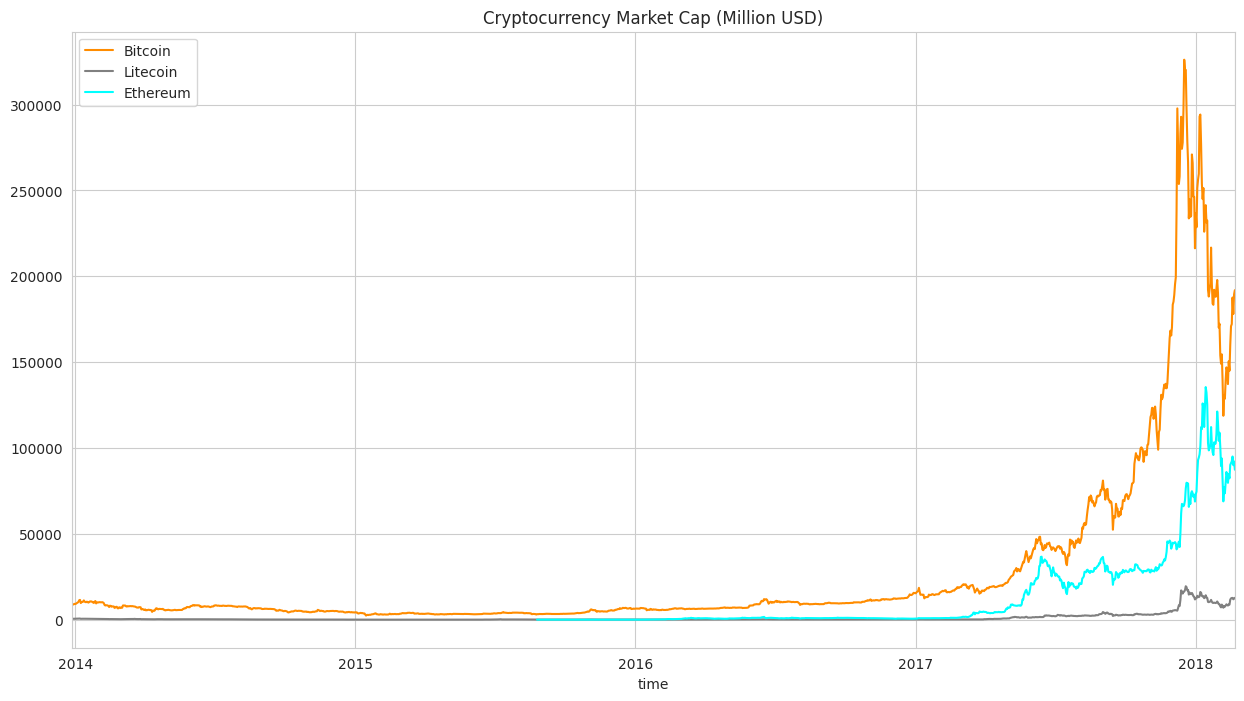

In [15]:
# plot market capitalization
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']

ethereum = data[data['symbol']=='ETH']


plt.figure(figsize=(15,8))
(bitcoin['market']/1000000).plot(color='darkorange', label='Bitcoin')
(litecoin['market']/1000000).plot(color='grey', label='Litecoin')

(ethereum['market']/1000000).plot(color='cyan', label='Ethereum')


plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Market Cap (Million USD)')
plt.show()

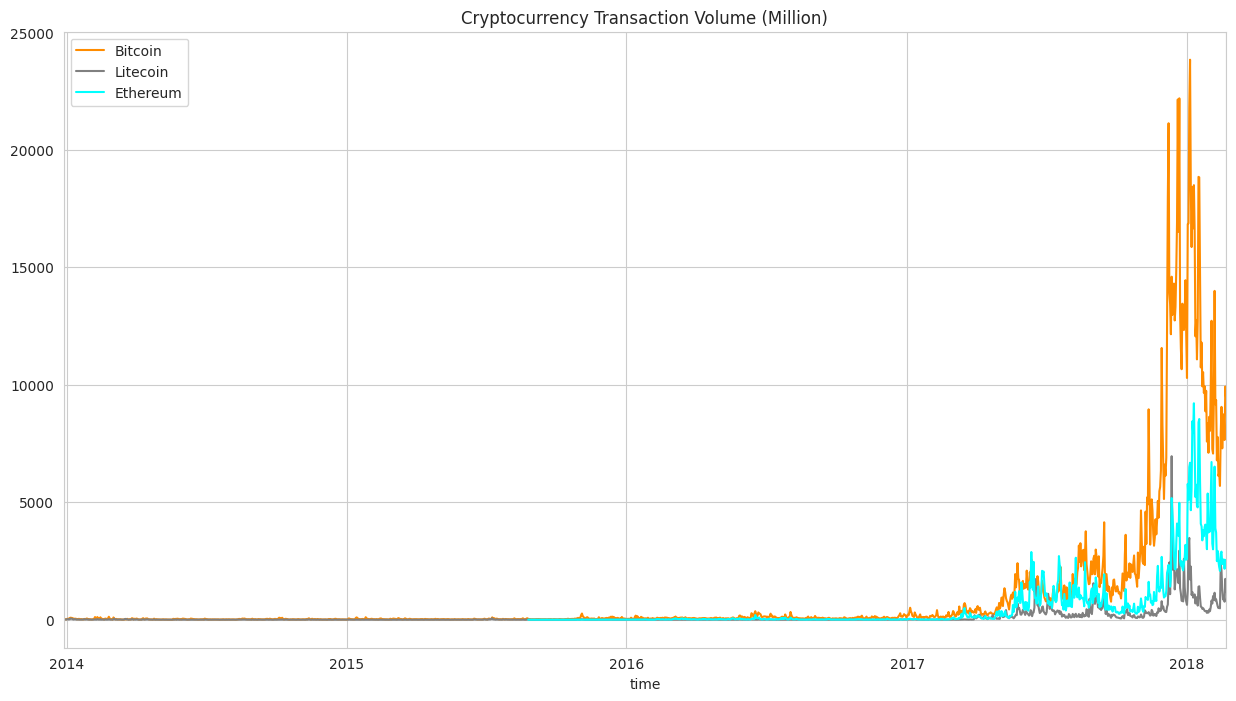

In [16]:
# plot transaction volume
plt.figure(figsize=(15,8))
(bitcoin['volume']/1000000).plot(color='darkorange', label='Bitcoin')
(litecoin['volume']/1000000).plot(color='grey', label='Litecoin')

(ethereum['volume']/1000000).plot(color='cyan', label='Ethereum')

plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Transaction Volume (Million)')
plt.show()

In [17]:
data_m = data['2017-12-01':'2017-12-31']
#data_m = data.loc[data['date'] >= '2017-01-01']

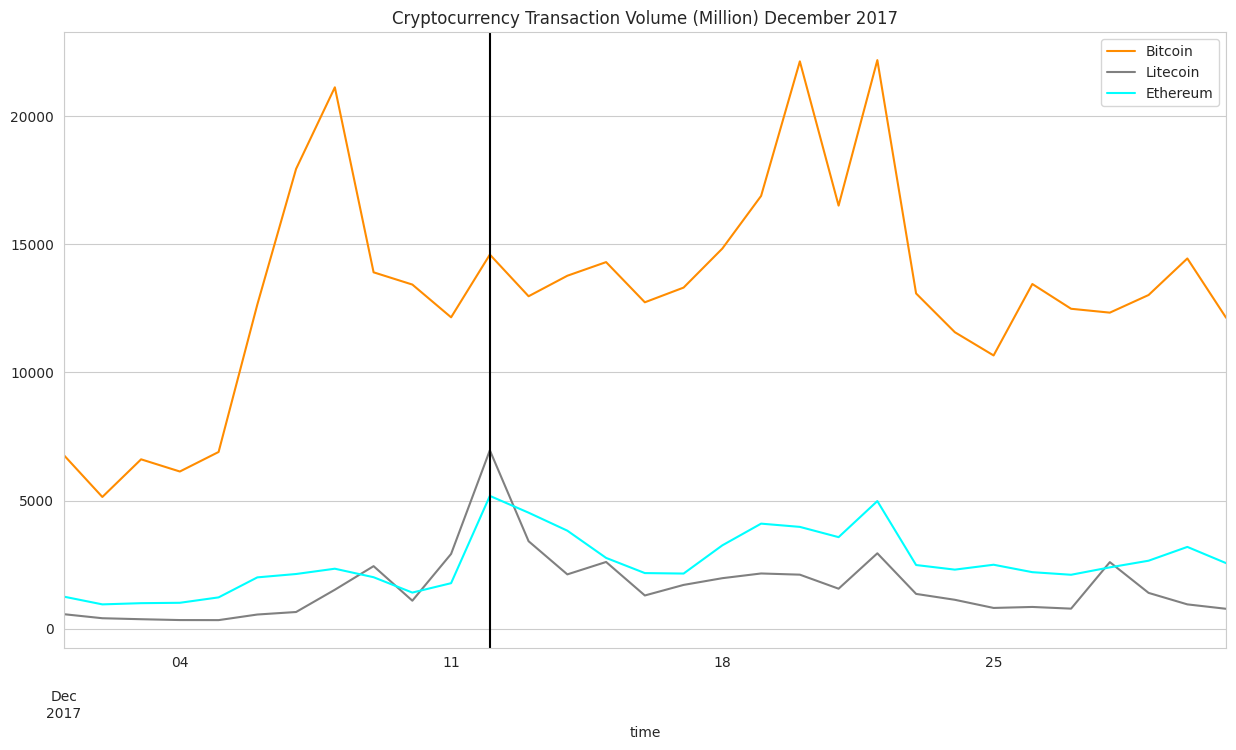

In [18]:
bitcoin = data_m[data_m['symbol']=='BTC']
litecoin = data_m[data_m['symbol']=='LTC']

ethereum = data_m[data_m['symbol']=='ETH']


plt.figure(figsize=(15,8))
(bitcoin['volume']/1000000).plot(color='darkorange', label='Bitcoin')
(litecoin['volume']/1000000).plot(color='grey', label='Litecoin')

(ethereum['volume']/1000000).plot(color='cyan', label='Ethereum')

plt.axvline(dt.datetime(2017, 12, 12),color='black')
plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Transaction Volume (Million) December 2017')
plt.show()

In [19]:
data = data['2017-01-01':]
data.head()

slug symbol     name  ranknow     open     high      low  \
date                                                                      
2017-01-01  bitcoin    BTC  Bitcoin        1   963.66  1003.08   958.70   
2017-01-02  bitcoin    BTC  Bitcoin        1   998.62  1031.39   996.70   
2017-01-03  bitcoin    BTC  Bitcoin        1  1021.60  1044.08  1021.60   
2017-01-04  bitcoin    BTC  Bitcoin        1  1044.40  1159.42  1044.40   
2017-01-05  bitcoin    BTC  Bitcoin        1  1156.73  1191.10   910.42   

              close     volume       market  close_ratio  spread   moving_avg  \
date                                                                            
2017-01-01   998.33  147775000  15491200000       0.8930   44.38   959.077143   
2017-01-02  1021.75  222185000  16055100000       0.7221   34.69   975.382857   
2017-01-03  1043.84  185168000  16426600000       0.9893   22.48   991.188571   
2017-01-04  1154.73  344946000  16795400000       0.9592  115.02  1016.732857   
2017-01-05  1013.38  510199000  18604000000       0.3668  280.68  1022.430000   

                  rsi  hist_volatility   upper_band  lower_band  volume_change  
date                                                                            
2017-01-01  85.981438         0.028598  1031.241957  711.691043       0.490643  
2017-01-02  86.941935         0.022580  1050.651192  716.400808       0.503536  
2017-01-03  87.503087         0.018916  1071.070577  722.217423      -0.166604  
2017-01-04  89.915548         0.033300  1115.464128  715.487872       0.862881  
2017-01-05  64.520976         0.057776  1121.513953  732.285047       0.479069

### Price Fluctuation of Cryptocurrencies<a id="3-2"></a>

Check opening, closing, highest, and lowest price for each of the cryptocurrency.

In [20]:
data['oc_diff']=data['close']-data['open']
data.head()

slug symbol     name  ranknow     open     high      low  \
date                                                                      
2017-01-01  bitcoin    BTC  Bitcoin        1   963.66  1003.08   958.70   
2017-01-02  bitcoin    BTC  Bitcoin        1   998.62  1031.39   996.70   
2017-01-03  bitcoin    BTC  Bitcoin        1  1021.60  1044.08  1021.60   
2017-01-04  bitcoin    BTC  Bitcoin        1  1044.40  1159.42  1044.40   
2017-01-05  bitcoin    BTC  Bitcoin        1  1156.73  1191.10   910.42   

              close     volume       market  close_ratio  spread   moving_avg  \
date                                                                            
2017-01-01   998.33  147775000  15491200000       0.8930   44.38   959.077143   
2017-01-02  1021.75  222185000  16055100000       0.7221   34.69   975.382857   
2017-01-03  1043.84  185168000  16426600000       0.9893   22.48   991.188571   
2017-01-04  1154.73  344946000  16795400000       0.9592  115.02  1016.732857   
2017-01-05  1013.38  510199000  18604000000       0.3668  280.68  1022.430000   

                  rsi  hist_volatility   upper_band  lower_band  \
date                                                              
2017-01-01  85.981438         0.028598  1031.241957  711.691043   
2017-01-02  86.941935         0.022580  1050.651192  716.400808   
2017-01-03  87.503087         0.018916  1071.070577  722.217423   
2017-01-04  89.915548         0.033300  1115.464128  715.487872   
2017-01-05  64.520976         0.057776  1121.513953  732.285047   

            volume_change  oc_diff  
date                                
2017-01-01       0.490643    34.67  
2017-01-02       0.503536    23.13  
2017-01-03      -0.166604    22.24  
2017-01-04       0.862881   110.33  
2017-01-05       0.479069  -143.35

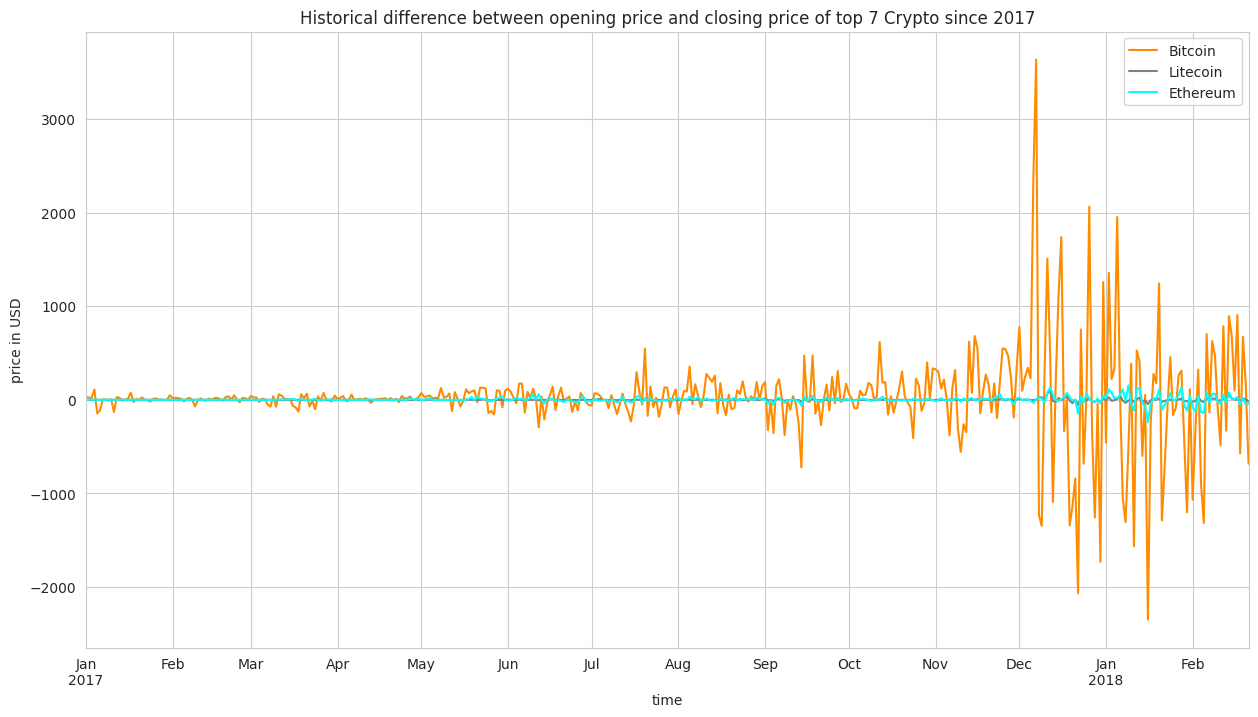

In [21]:
# Difference between opening and closing price
data['oc_diff']=data['close']-data['open']
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']

ethereum = data[data['symbol']=='ETH']


plt.figure(figsize=(15,8))
(bitcoin['oc_diff']).plot(color='darkorange', label='Bitcoin')
(litecoin['oc_diff']).plot(color='grey', label='Litecoin')

(ethereum['oc_diff']).plot(color='cyan', label='Ethereum')


plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical difference between opening price and closing price of top 7 Crypto since 2017')
plt.legend()
plt.show()

In [22]:
# Average difference for each cryptocurrency
ave_diff={'bitcoin':[(bitcoin['oc_diff']).mean()],
          'litecoin':[(litecoin['oc_diff']).mean()],
          'ethereum':[(ethereum['oc_diff']).mean()]}
pd.DataFrame(ave_diff, index=['avg.diff'])

bitcoin  litecoin  ethereum
avg.diff  22.604724  0.450552   1.86199

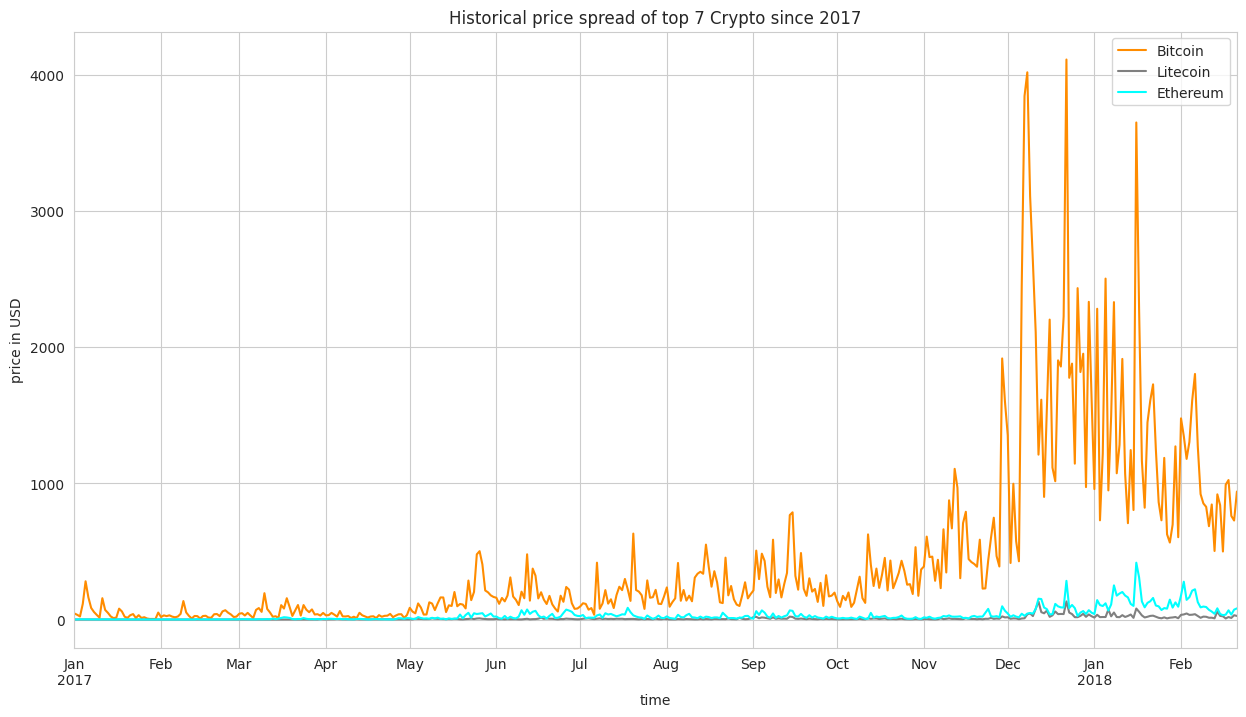

In [23]:
# Differences of daily highest price and lowest price
plt.figure(figsize=(15,8))
(bitcoin['spread']).plot(color='darkorange', label='Bitcoin')
(litecoin['spread']).plot(color='grey', label='Litecoin')
#(ripple['spread']).plot(color='blue', label='Ripple')
#(monero['spread']).plot(color='yellow', label='Monero')
(ethereum['spread']).plot(color='cyan', label='Ethereum')
#(zcash['spread']).plot(color='red', label='Zcash')
#(bitcoin_cash['spread']).plot(color='green', label='Bitcoin Cash')

plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical price spread of top 7 Crypto since 2017')
plt.legend()
plt.show()

In [24]:
# Average spread for each cryptocurrency
ave_spread={'bitcoin':[(bitcoin['spread']).mean()],
          'litecoin':[(litecoin['spread']).mean()],
          'ethereum':[(ethereum['spread']).mean()],}
pd.DataFrame(ave_spread, index=['avg.spread'])

bitcoin  litecoin   ethereum
avg.spread  440.968441  8.522134  33.442902

### Moving Averages and Price Trend<a id="3-3"></a>

A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

In [25]:
# calculate 5-day moving averages
btc = bitcoin[['close']]
btc.columns = ['BTC']
btc_ma=btc.rolling(window=5).mean()

ltc = litecoin[['close']]
ltc.columns = ['LTC']
ltc_ma=ltc.rolling(window=5).mean()



eth = ethereum[['close']]
eth.columns = ['ETH']
eth_ma=eth.rolling(window=5).mean()


# create matrix of close price only for later use
close = pd.concat([btc,ltc,eth], axis=1)
close_ma = pd.concat([btc_ma,ltc_ma,eth_ma], axis=1)
close_ma.tail()

BTC      LTC      ETH
date                                   
2018-02-17   9921.188  211.586  924.826
2018-02-18  10311.886  222.824  940.558
2018-02-19  10658.020  224.764  944.620
2018-02-20  10905.480  226.248  936.298
2018-02-21  10996.780  222.894  917.450

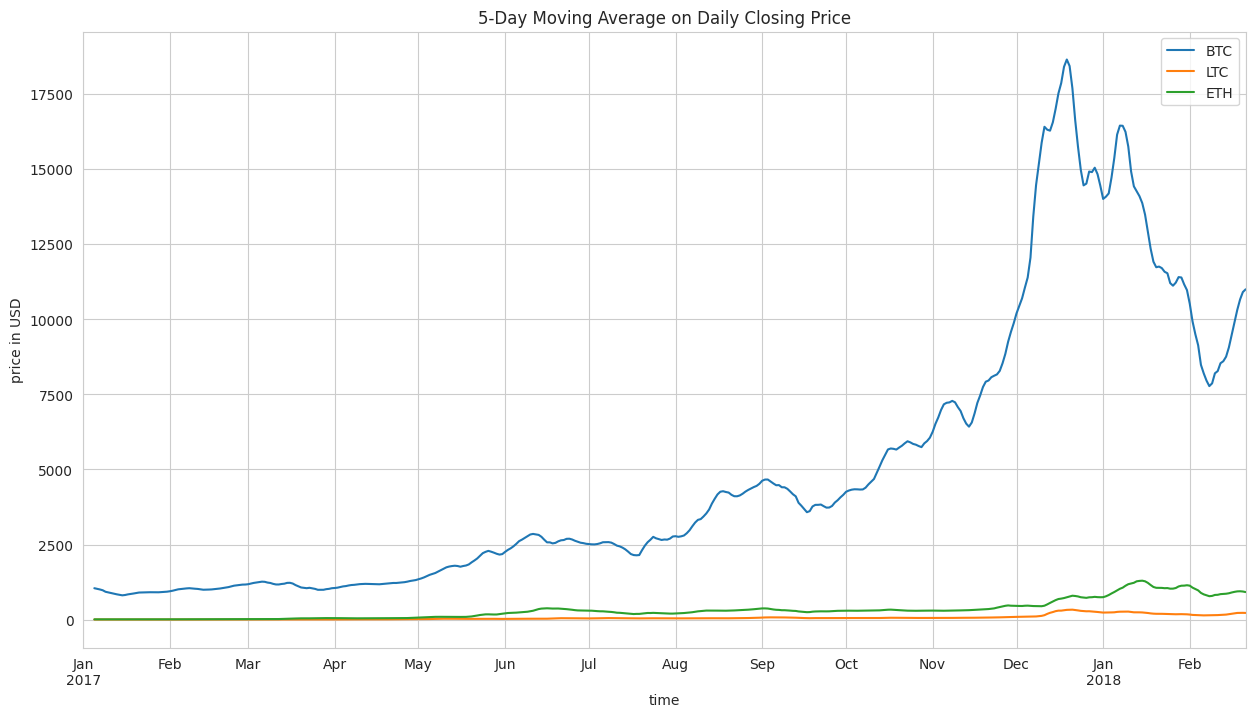

In [26]:
# plot moving average for closing price for cryptocurrencies
close_ma.plot(figsize=(15,8))
plt.title('5-Day Moving Average on Daily Closing Price')
plt.xlabel('time')
plt.ylabel('price in USD')
plt.show()

### Market Prices of Cryptocurrencies<a id="3-4"></a>

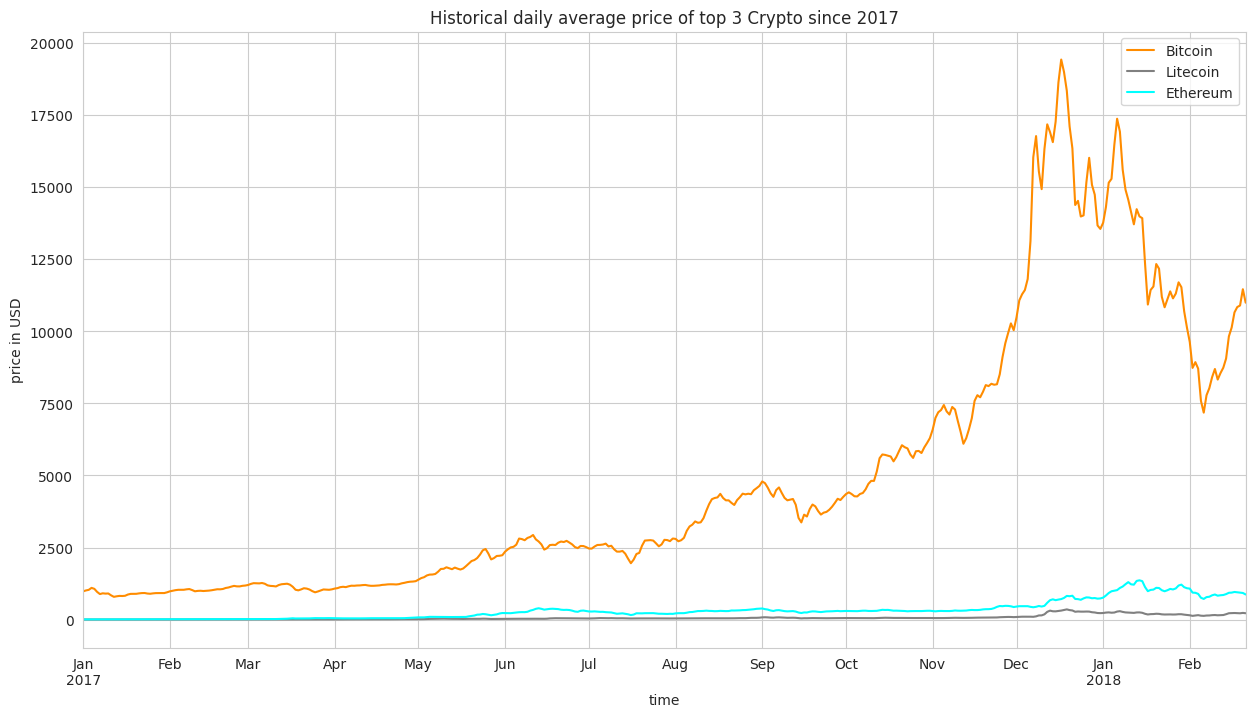

In [27]:
# calculate daily average price
data['daily_avg'] = (data['open'] + data['high'] + data['low'] + data['close']) / 4
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']

ethereum = data[data['symbol']=='ETH']


plt.figure(figsize=(15,8))
(bitcoin['daily_avg']).plot(color='darkorange', label='Bitcoin')
(litecoin['daily_avg']).plot(color='grey', label='Litecoin')

(ethereum['daily_avg']).plot(color='cyan', label='Ethereum')


plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical daily average price of top 3 Crypto since 2017')
plt.legend()
plt.show()

#### Plot individual daily open, high, low, close prices

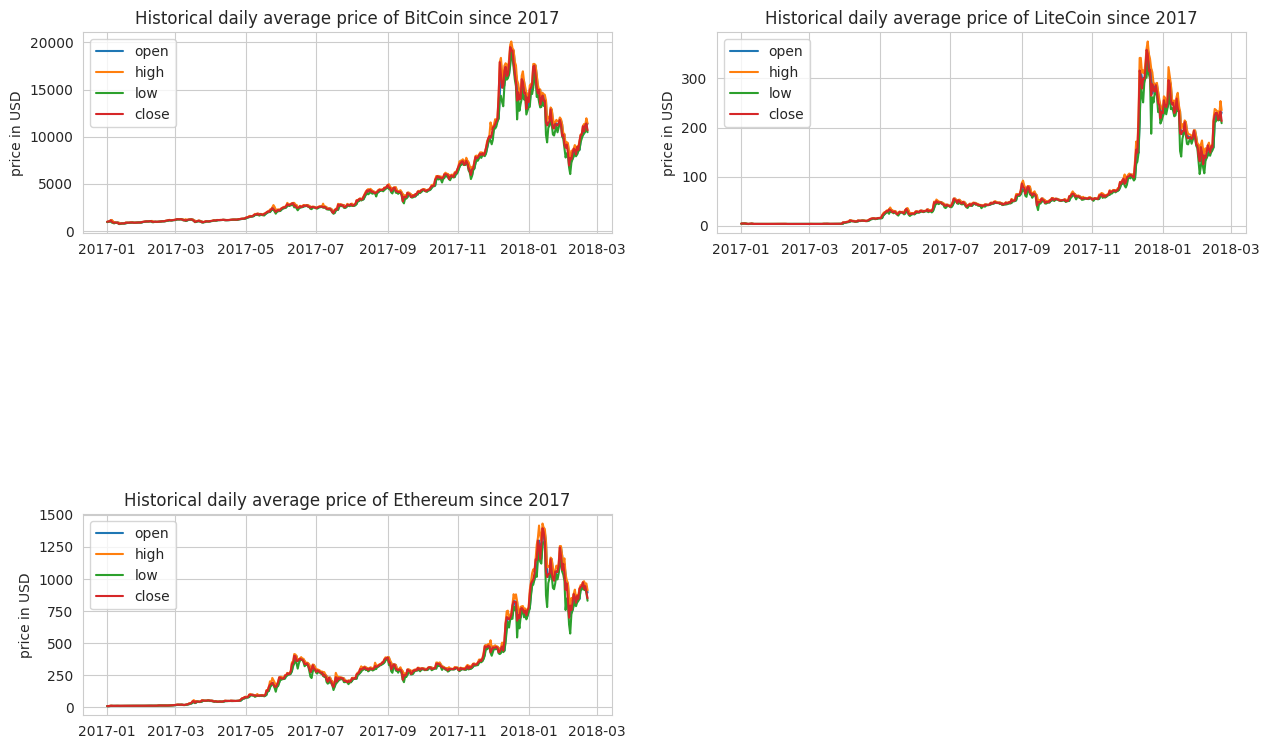

In [28]:
plt.figure(figsize=(15, 12))
plt.subplot(4,2,1)
plt.plot(bitcoin[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of BitCoin since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,2)
plt.plot(litecoin[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of LiteCoin since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,5)
plt.plot(ethereum[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Ethereum since 2017')
plt.legend(['open','high','low','close'])

plt.show()

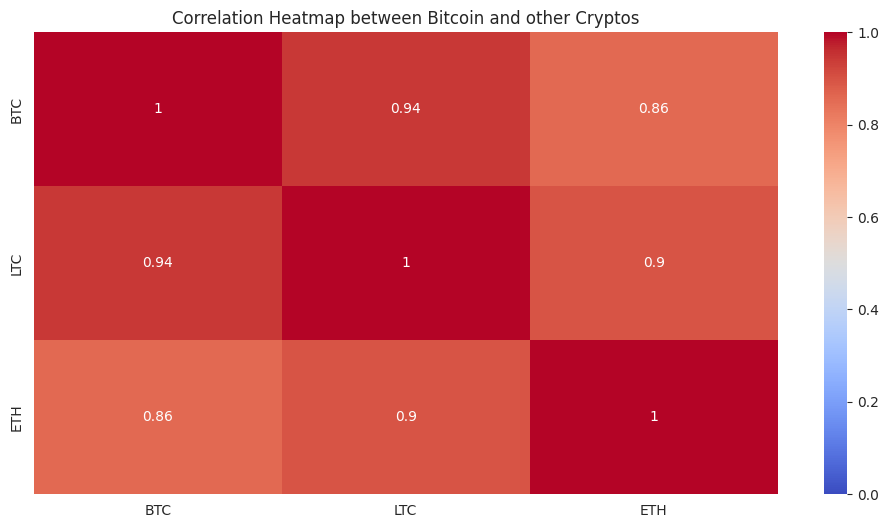

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(close.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap between Bitcoin and other Cryptos')
plt.show()

# **RSI**

# Bitcoin vs Litecoin vs Ethereum

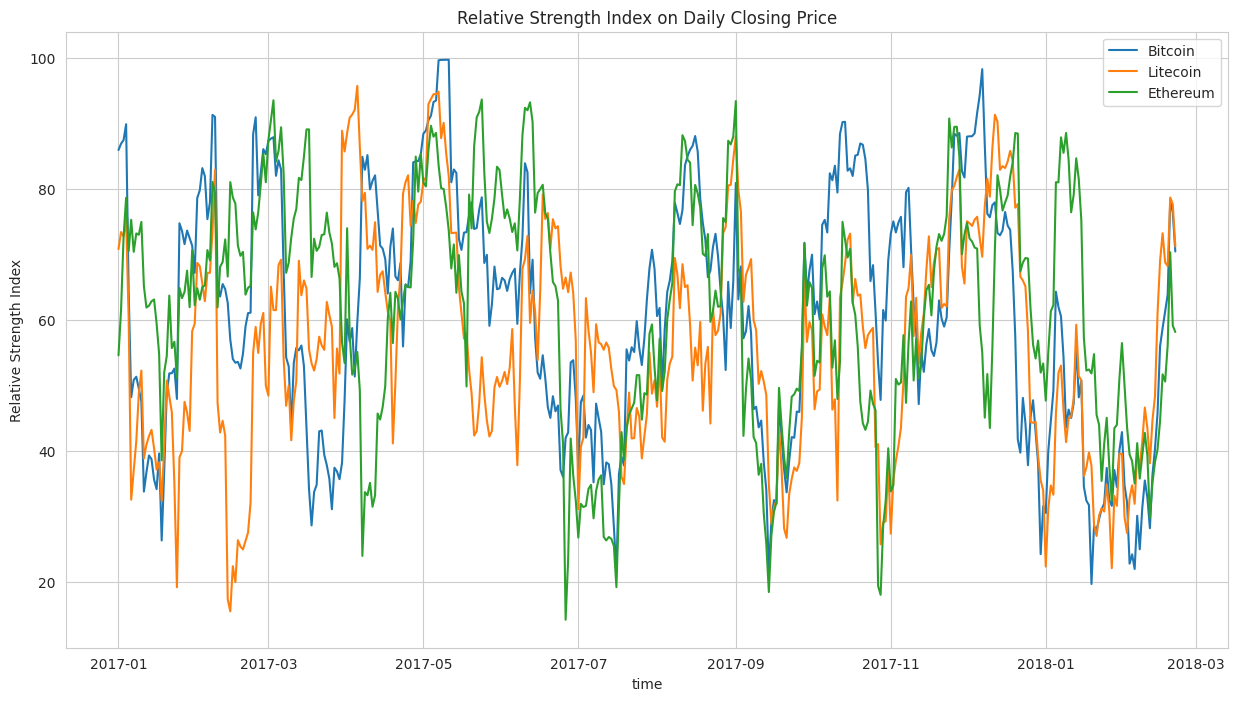

In [30]:
# Plot RSI
plt.figure(figsize=(15, 8))
plt.plot(bitcoin.index, bitcoin['rsi'], label='Bitcoin')
plt.plot(litecoin.index, litecoin['rsi'], label='Litecoin')
plt.plot(ethereum.index, ethereum['rsi'], label='Ethereum')
plt.xlabel('time')
plt.ylabel('Relative Strength Index')
plt.title('Relative Strength Index on Daily Closing Price')
plt.legend()
plt.show()

# **Historical Volatility**

# Bitcoin vs Litecoin vs Ethereum

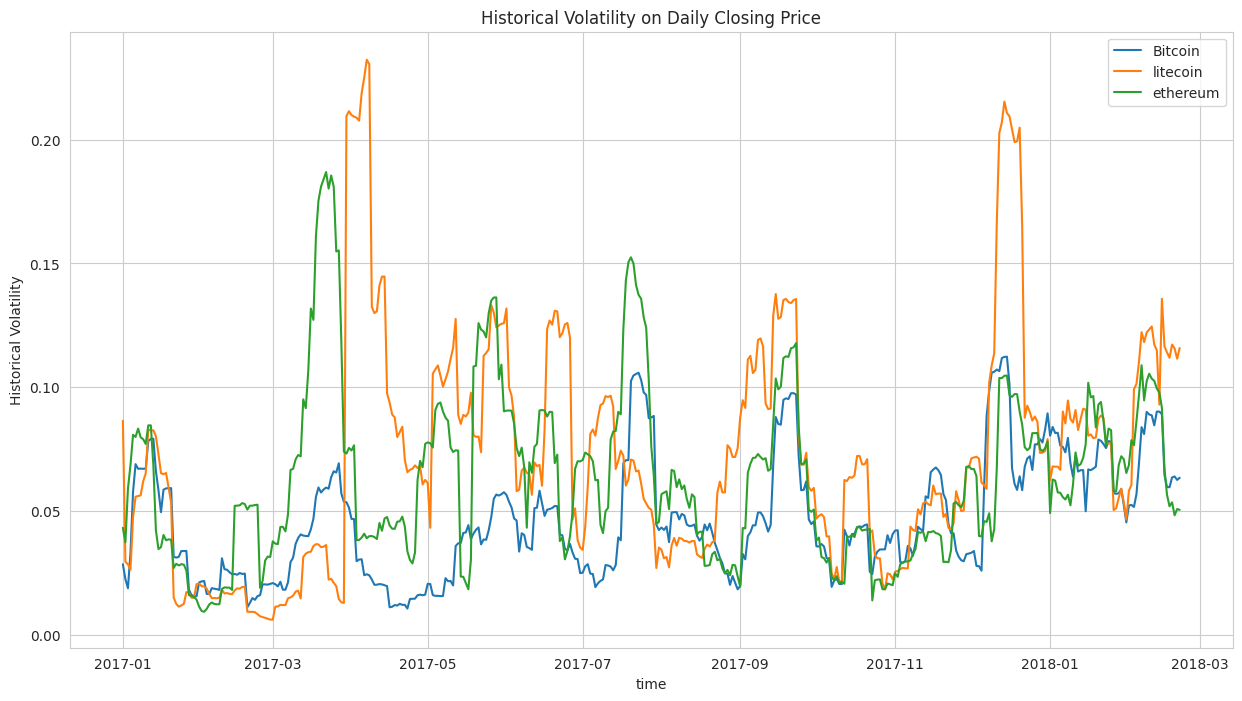

In [31]:
# Plot historical_volatility
plt.figure(figsize=(15, 8))
plt.plot(bitcoin.index, bitcoin['hist_volatility'], label='Bitcoin')
plt.plot(litecoin.index, litecoin['hist_volatility'], label='litecoin')
plt.plot(ethereum.index, ethereum['hist_volatility'], label='ethereum')
plt.xlabel('time')
plt.ylabel('Historical Volatility')
plt.title('Historical Volatility on Daily Closing Price')
plt.legend()
plt.show()

# **Bollinger Bands**

# Bitcoin vs Litecoin vs Ethereum

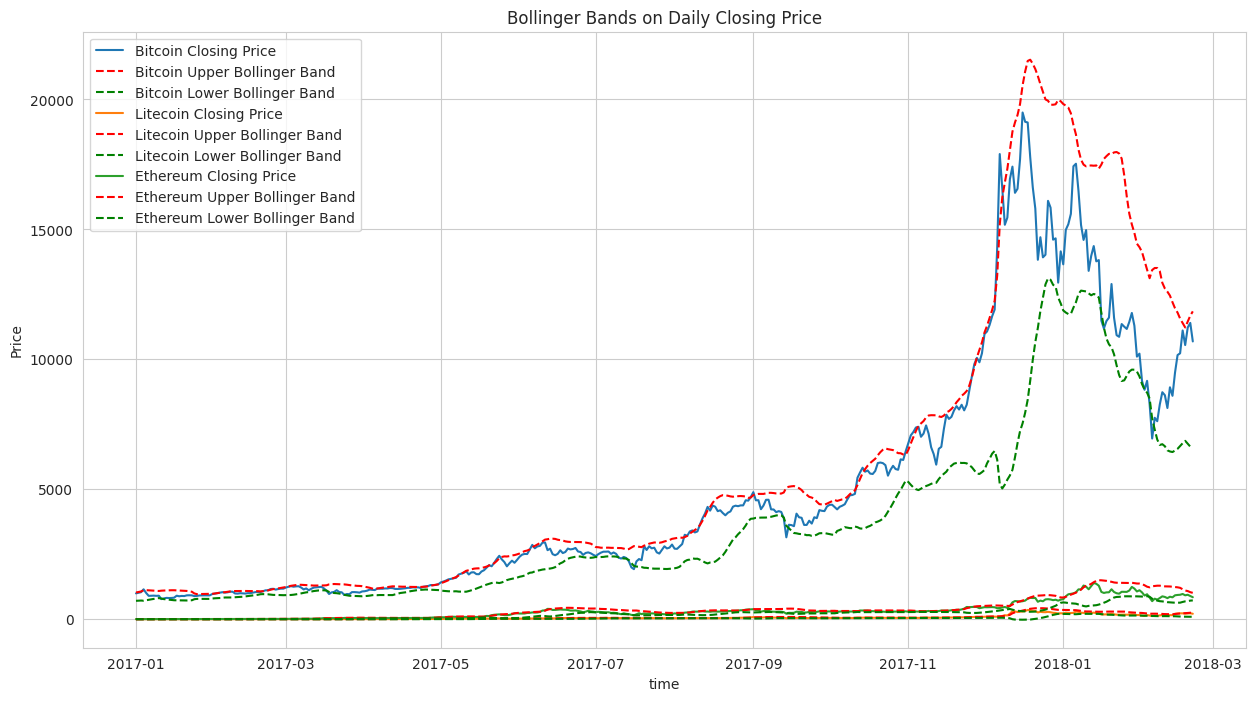

In [32]:
# Plot Bollinger Bands
plt.figure(figsize=(15, 8))
plt.plot(bitcoin.index, bitcoin['close'], label='Bitcoin Closing Price')
plt.plot(bitcoin.index, bitcoin['upper_band'], label='Bitcoin Upper Bollinger Band', linestyle='--', color='red')
plt.plot(bitcoin.index, bitcoin['lower_band'], label='Bitcoin Lower Bollinger Band', linestyle='--', color='green')
plt.plot(litecoin.index, litecoin['close'], label='Litecoin Closing Price')
plt.plot(litecoin.index, litecoin['upper_band'], label='Litecoin Upper Bollinger Band', linestyle='--', color='red')
plt.plot(litecoin.index, litecoin['lower_band'], label='Litecoin Lower Bollinger Band', linestyle='--', color='green')
plt.plot(ethereum.index, ethereum['close'], label='Ethereum Closing Price')
plt.plot(ethereum.index, ethereum['upper_band'], label='Ethereum Upper Bollinger Band', linestyle='--', color='red')
plt.plot(ethereum.index, ethereum['lower_band'], label='Ethereum Lower Bollinger Band', linestyle='--', color='green')
plt.xlabel('time')
plt.ylabel('Price')
plt.title('Bollinger Bands on Daily Closing Price')
plt.legend()
plt.show()

# **Trading Volume**

# Bitcoin vs Litecoin vs Ethereum

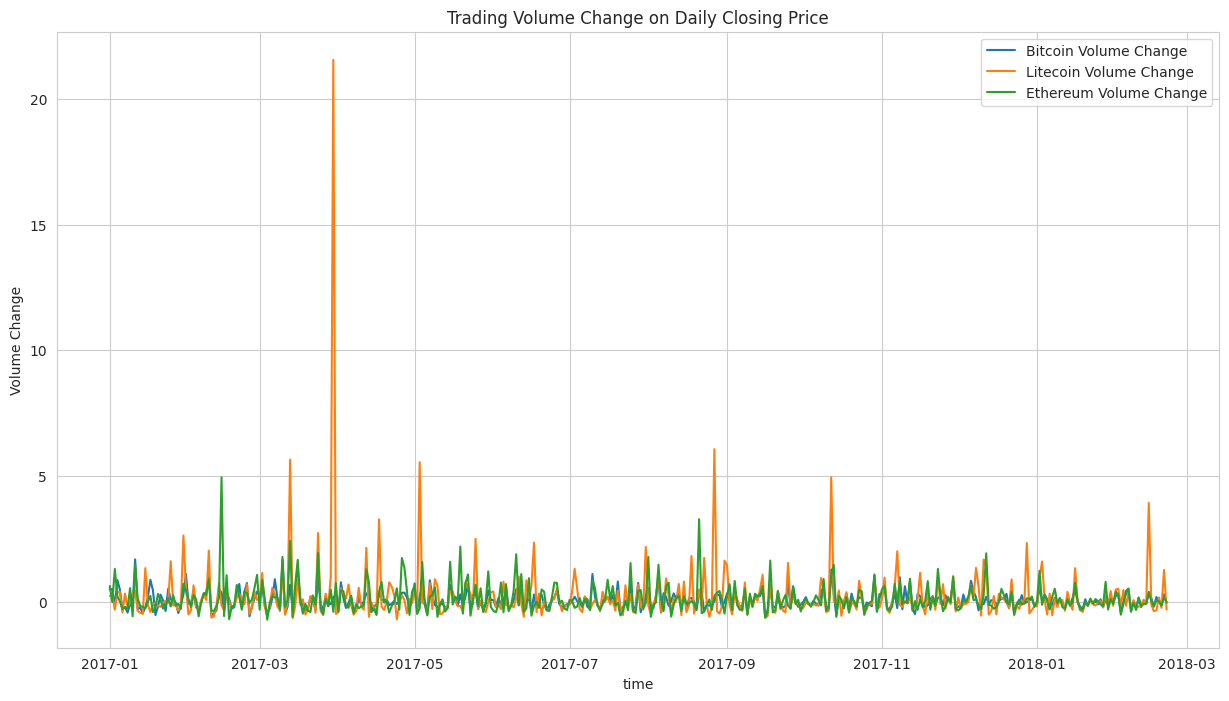

In [33]:
# Plot volume_change
plt.figure(figsize=(15, 8))
plt.plot(bitcoin.index, bitcoin['volume_change'], label='Bitcoin Volume Change')
plt.plot(litecoin.index, litecoin['volume_change'], label='Litecoin Volume Change')
plt.plot(ethereum.index, ethereum['volume_change'], label='Ethereum Volume Change')
plt.xlabel('time')
plt.ylabel('Volume Change')
plt.title('Trading Volume Change on Daily Closing Price')
plt.legend()
plt.show()

# **Return Ratio**

# Bitcoin vs Litecoin vs Ethereum

return ratio = current value of the cryptocurrency / initial value of the cryptocurrency

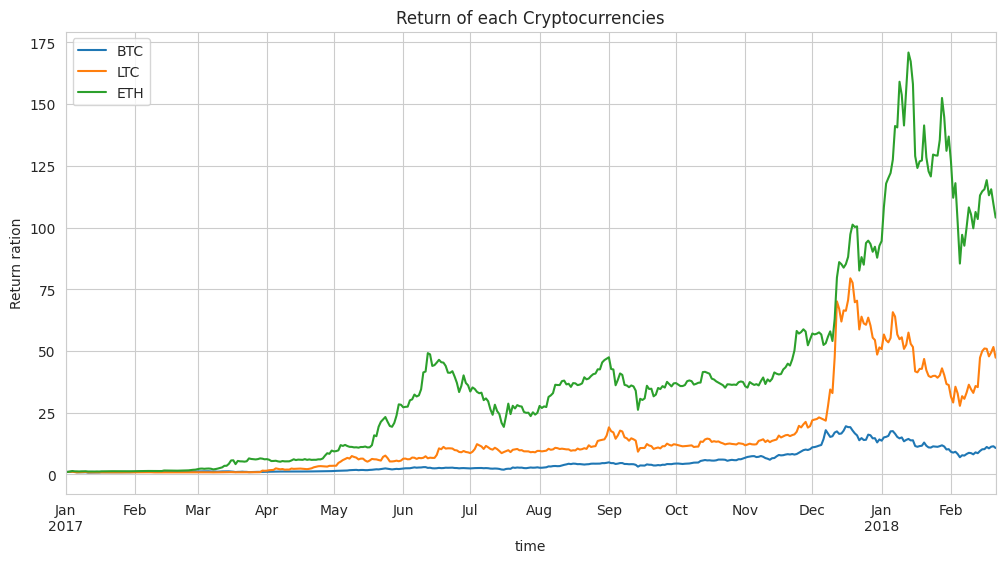

In [34]:
returns = close.apply(lambda x: x/x[0])
returns.plot(figsize=(12,6))
plt.ylabel('Return ration')
plt.xlabel('time')
plt.title('Return of each Cryptocurrencies')
plt.show()

#**4. Model Evaluation & Building**

### **APPROACH 1(**LONG-TERM CALL**)**


#### **Approach 1 is the extension we planned to experiment after the presentation**

We discuss and implemented the utilization of two approaches to understand the crypto market and derive valuable Business insights. The primary motivation behind adopting these approaches is to gain a comprehensive understanding of the market dynamics and cater to the needs of different types of investors and traders.



**Daily Average After a Month Price:**
The daily average after a month price is a useful metric for gaining insights into the overall behavior of the cryptocurrency market. This indicator helps smooth out the intraday fluctuations and provides a more comprehensive view of the market's movements over time. Using daily average prices for modeling and forecasting can help identify trends and patterns in the **long-term market** behavior, making it suitable for long-term investors and analysts seeking to understand the broader market dynamics.

The daily average price is particularly useful when comparing the performance of different cryptocurrencies, as it provides a standardized metric for comparison. Moreover, using daily average prices in predictive models can help reduce the impact of extreme price movements, thus potentially increasing the accuracy and reliability of the forecasts.


**Note:** We performed approach 1 only for decision trees not for Neural Nets because Using the daily average price, especially a monthly averaged one, as an outcome variable for LSTM models might not be as useful because it can potentially reduce the granularity of the data. LSTM models are designed to capture temporal dependencies and patterns over a sequence of data points. In cryptocurrency markets, short-term price movements and intraday volatility are essential factors that LSTM models can learn from and make predictions based on.

### Prepare Data for Models<a id="4-1"></a>

In [35]:
# droping 'slug' and 'name' as we can just use 'symbol', and droping 'ranknow'.
data=data.drop(['slug', 'name', 'ranknow'], axis=1)

# Bitcoin (BTC)
BTC = data[data.symbol == 'BTC'].copy()
BTC['daily_avg_After_Month']=BTC['daily_avg'].shift(-30)
X_BTC = BTC.dropna().drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)
y_BTC = BTC.dropna()['daily_avg_After_Month']
X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = train_test_split(X_BTC, y_BTC, test_size=0.2)
X_forecast_BTC =  BTC.tail(30).drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)

# Ethereum (ETH)
ETH = data[data.symbol == 'ETH'].copy()
ETH['daily_avg_After_Month']=ETH['daily_avg'].shift(-30)
X_ETH = ETH.dropna().drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)
y_ETH = ETH.dropna()['daily_avg_After_Month']
X_train_ETH, X_test_ETH, y_train_ETH, y_test_ETH = train_test_split(X_ETH, y_ETH, test_size=0.2)
X_forecast_ETH =  ETH.tail(30).drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)

# Litecoin (LTC)
LTC = data[data.symbol == 'LTC'].copy()
LTC['daily_avg_After_Month']=LTC['daily_avg'].shift(-30)
X_LTC = LTC.dropna().drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)
y_LTC = LTC.dropna()['daily_avg_After_Month']
X_train_LTC, X_test_LTC, y_train_LTC, y_test_LTC = train_test_split(X_LTC, y_LTC, test_size=0.2)
X_forecast_LTC =  LTC.tail(30).drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)


### Applying Machine Learning Models<a id="4-2"></a>

In [36]:
# define regression function
def regression(X_train, X_test, y_train, y_test):
    Regressor = {
        'Linear Regression(Baseline)': LinearRegression(),
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=500),
        'ExtraTrees Regressor': ExtraTreesRegressor(n_estimators=500, min_samples_split=5),
        'Bayesian Ridge': BayesianRidge(),
        'Elastic Net CV': ElasticNetCV()
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train)
    
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, clf.predict(X_test)):.2f}')
        print(f'MSE: {mean_squared_error(y_test, clf.predict(X_test)):.2f}')
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, clf.predict(X_test))):.2f}")
        print()

In [37]:
# Bitcoin (BTC)
print('Bitcoin (BTC):')
regression(X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC)

Bitcoin (BTC):
Linear Regression(Baseline)
R2: 0.82
MAE: 1319.31
MSE: 4378979.12
Root Mean Squared Error: 2092.60

Random Forest Regressor
R2: 0.98
MAE: 411.29
MSE: 398650.34
Root Mean Squared Error: 631.39

Gradient Boosting Regressor
R2: 0.98
MAE: 410.91
MSE: 373758.94
Root Mean Squared Error: 611.36

ExtraTrees Regressor
R2: 0.99
MAE: 365.53
MSE: 299722.26
Root Mean Squared Error: 547.47

Bayesian Ridge
R2: 0.81
MAE: 1291.21
MSE: 4434400.04
Root Mean Squared Error: 2105.80

Elastic Net CV
R2: 0.75
MAE: 1529.64
MSE: 5811974.92
Root Mean Squared Error: 2410.80



In [38]:
# Ethereum (ETH)
print('Ethereum (ETH):')
regression(X_train_ETH, X_test_ETH, y_train_ETH, y_test_ETH)

Ethereum (ETH):
Linear Regression(Baseline)
R2: 0.64
MAE: 137.85
MSE: 38997.46
Root Mean Squared Error: 197.48

Random Forest Regressor
R2: 0.94
MAE: 37.15
MSE: 6114.25
Root Mean Squared Error: 78.19

Gradient Boosting Regressor
R2: 0.94
MAE: 40.25
MSE: 6630.59
Root Mean Squared Error: 81.43

ExtraTrees Regressor
R2: 0.96
MAE: 33.19
MSE: 4640.05
Root Mean Squared Error: 68.12

Bayesian Ridge
R2: 0.65
MAE: 137.85
MSE: 37585.65
Root Mean Squared Error: 193.87

Elastic Net CV
R2: 0.65
MAE: 137.13
MSE: 37620.04
Root Mean Squared Error: 193.96



In [39]:
# Litecoin (LTC)
print('Litecoin (LTC):')
regression(X_train_LTC, X_test_LTC, y_train_LTC, y_test_LTC)

Litecoin (LTC):
Linear Regression(Baseline)
R2: 0.70
MAE: 28.24
MSE: 1894.81
Root Mean Squared Error: 43.53

Random Forest Regressor
R2: 0.93
MAE: 9.08
MSE: 426.93
Root Mean Squared Error: 20.66

Gradient Boosting Regressor
R2: 0.92
MAE: 9.62
MSE: 516.94
Root Mean Squared Error: 22.74

ExtraTrees Regressor
R2: 0.96
MAE: 8.46
MSE: 262.02
Root Mean Squared Error: 16.19

Bayesian Ridge
R2: 0.68
MAE: 28.47
MSE: 2008.85
Root Mean Squared Error: 44.82

Elastic Net CV
R2: 0.58
MAE: 32.94
MSE: 2635.86
Root Mean Squared Error: 51.34



### Prices Prediction<a id="4-3"></a>

In [40]:
# define prediction function
def prediction(name, X, y, X_forecast):
    if name in ['BTC']:
        model = GradientBoostingRegressor(n_estimators=500)
    else:
        model = ExtraTreesRegressor(n_estimators=500, min_samples_split=5)
    model.fit(X, y)
    target = model.predict(X_forecast)
    return target

In [41]:
# calculate forecasted prices for next 30 days
forecasted_BTC = prediction('BTC', X_BTC, y_BTC, X_forecast_BTC)
forecasted_ETH = prediction('ETH', X_ETH, y_ETH, X_forecast_ETH)
forecasted_LTC = prediction('LTC', X_LTC, y_LTC, X_forecast_LTC)


In [42]:
# define index for next 30 days
last_date=data.iloc[-1].name
modified_date = last_date + dt.timedelta(days=1)
new_date = pd.date_range(modified_date,periods=30,freq='D')

# assign prediction to newly defined index
forecasted_BTC = pd.DataFrame(forecasted_BTC, columns=['daily_avg'], index=new_date)
forecasted_ETH = pd.DataFrame(forecasted_ETH, columns=['daily_avg'], index=new_date)
forecasted_LTC = pd.DataFrame(forecasted_LTC, columns=['daily_avg'], index=new_date)

# combine historical price and predicted price
bitcoin = pd.concat([data[data['symbol']=='BTC'][['daily_avg']], forecasted_BTC])
litecoin = pd.concat([data[data['symbol']=='LTC'][['daily_avg']], forecasted_LTC])

ethereum = pd.concat([data[data['symbol']=='ETH'][['daily_avg']], forecasted_ETH])


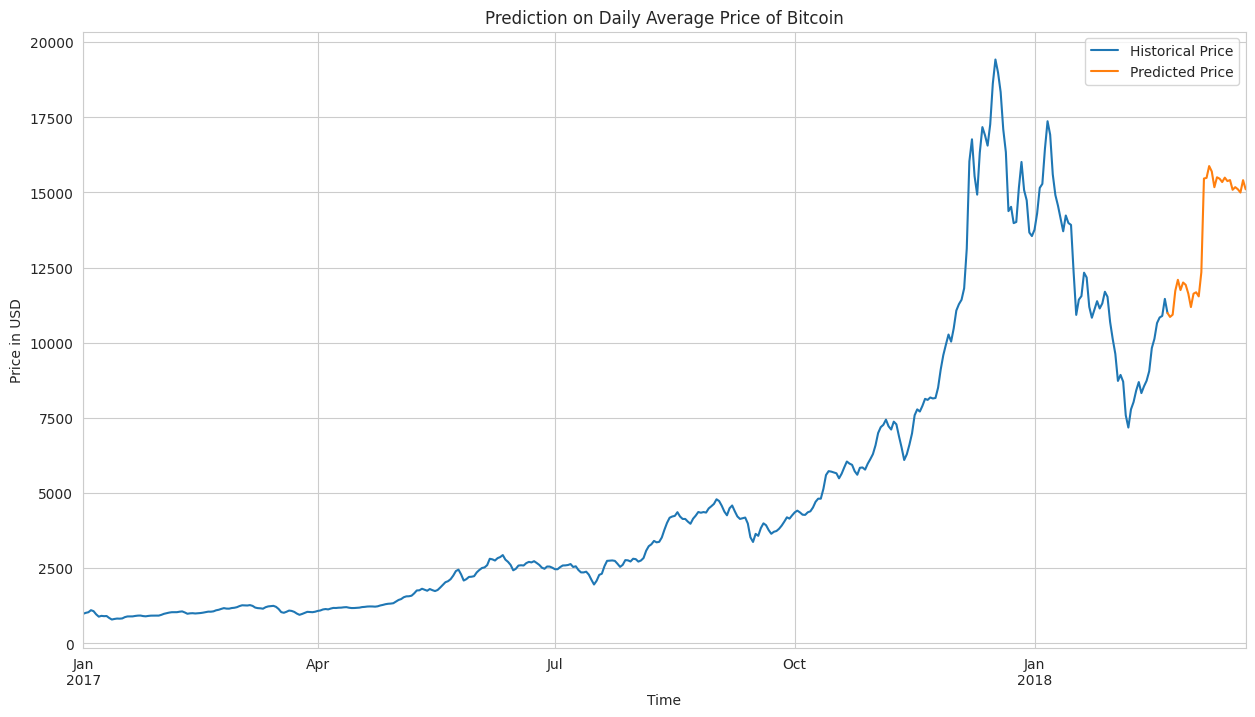

In [43]:
plt.figure(figsize=(15,8))
(bitcoin[:-30]['daily_avg']).plot(label='Historical Price')
(bitcoin[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Bitcoin')
plt.legend()
plt.show()

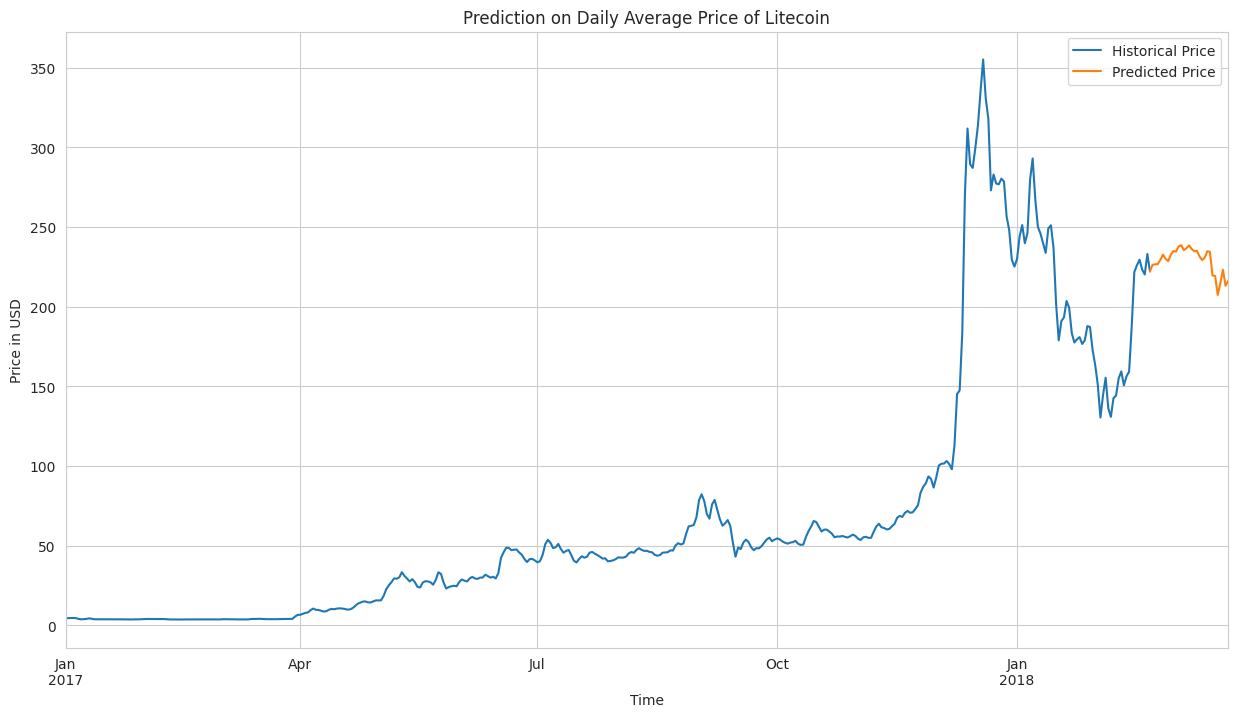

In [44]:
plt.figure(figsize=(15,8))
(litecoin[:-30]['daily_avg']).plot(label='Historical Price')
(litecoin[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Litecoin')
plt.legend()
plt.show()

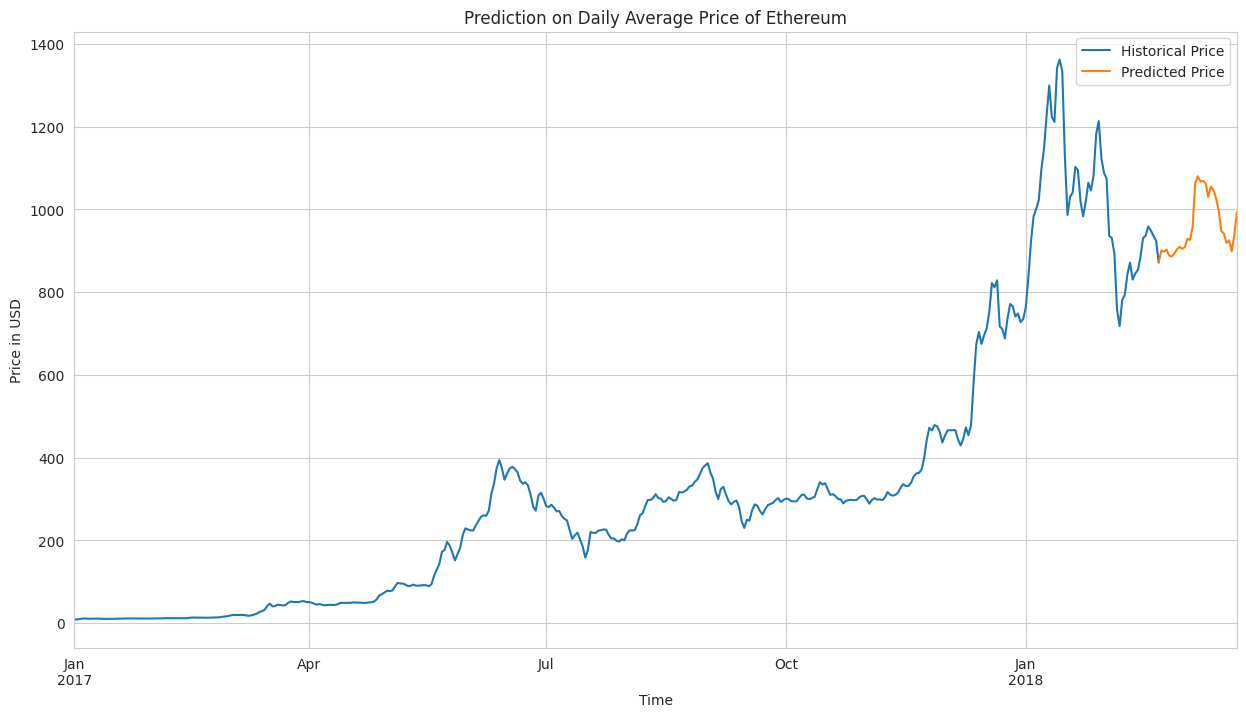

In [45]:
plt.figure(figsize=(15,8))
(ethereum[:-30]['daily_avg']).plot(label='Historical Price')
(ethereum[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Ethereum')
plt.legend()
plt.show()

### **APPROACH 2(**SHORT-TERM CALL**)**

**Close Price:**
The close price, on the other hand, represents the final price at which a cryptocurrency is traded during a specific time period, typically a day. The close price is an essential metric for traders and investors, as it provides information on the market's sentiment at the end of the trading day. The close price is often used as a reference point for the next day's opening price, making it a critical component of **short-term market analysis.**

In terms of forecasting, using close prices as an outcome variable can lead to more accurate predictions for short-term price movements. As a result, close price forecasting models can be particularly helpful for short-term traders who rely on timely and precise market information to execute their trading strategies. Additionally, the close price is a vital input for calculating other technical indicators, such as moving averages and Bollinger Bands, which play a significant role in technical analysis.

In [46]:
# Bitcoin (BTC)
BTC = data[data.symbol == 'BTC'].copy()
X_BTC = BTC.drop(['symbol', 'close'], axis=1)
y_BTC = BTC['close']
X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = train_test_split(X_BTC, y_BTC, test_size=0.2)

# Ethereum (ETH)
ETH = data[data.symbol == 'ETH'].copy()
X_ETH = ETH.drop(['symbol', 'close'], axis=1)
y_ETH = ETH['close']
X_train_ETH, X_test_ETH, y_train_ETH, y_test_ETH = train_test_split(X_ETH, y_ETH, test_size=0.2)

# Litecoin (LTC)
LTC = data[data.symbol == 'LTC'].copy()
X_LTC = LTC.drop(['symbol', 'close'], axis=1)
y_LTC = LTC['close']
X_train_LTC, X_test_LTC, y_train_LTC, y_test_LTC = train_test_split(X_LTC, y_LTC, test_size=0.2)

In [47]:
# define regression function
def regression2(X_train, X_test, y_train, y_test):
    Regressor = {
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=500),
        'ExtraTrees Regressor': ExtraTreesRegressor(n_estimators=500, min_samples_split=5),
        'Bayesian Ridge': BayesianRidge(),
        'Elastic Net CV': ElasticNetCV()
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train)
    
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, clf.predict(X_test)):.2f}')
        print(f'MSE: {mean_squared_error(y_test, clf.predict(X_test)):.2f}')
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, clf.predict(X_test))):.2f}")
        print()

#Model Evaluation

In [48]:
# Bitcoin (BTC)
print('Bitcoin (BTC):')
regression2(X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC)

Bitcoin (BTC):
Random Forest Regressor
R2: 1.00
MAE: 167.47
MSE: 81421.27
Root Mean Squared Error: 285.34

Gradient Boosting Regressor
R2: 1.00
MAE: 141.68
MSE: 56351.35
Root Mean Squared Error: 237.38

ExtraTrees Regressor
R2: 1.00
MAE: 135.63
MSE: 60674.72
Root Mean Squared Error: 246.32

Bayesian Ridge
R2: -651.13
MAE: 97061.10
MSE: 15434566410.85
Root Mean Squared Error: 124235.93

Elastic Net CV
R2: 0.99
MAE: 307.90
MSE: 296941.55
Root Mean Squared Error: 544.92



In [49]:
# Ethereum (ETH)
print('Ethereum (ETH):')
regression2(X_train_ETH, X_test_ETH, y_train_ETH, y_test_ETH)

Ethereum (ETH):
Random Forest Regressor
R2: 1.00
MAE: 9.46
MSE: 434.16
Root Mean Squared Error: 20.84

Gradient Boosting Regressor
R2: 1.00
MAE: 7.54
MSE: 261.86
Root Mean Squared Error: 16.18

ExtraTrees Regressor
R2: 1.00
MAE: 7.52
MSE: 248.59
Root Mean Squared Error: 15.77

Bayesian Ridge
R2: -605.58
MAE: 5910.06
MSE: 74195494.18
Root Mean Squared Error: 8613.68

Elastic Net CV
R2: 0.99
MAE: 19.38
MSE: 1162.25
Root Mean Squared Error: 34.09



In [50]:
# Litecoin (LTC)
print('Litecoin (LTC):')
regression2(X_train_LTC, X_test_LTC, y_train_LTC, y_test_LTC)

Litecoin (LTC):
Random Forest Regressor
R2: 0.99
MAE: 2.70
MSE: 66.38
Root Mean Squared Error: 8.15

Gradient Boosting Regressor
R2: 0.99
MAE: 2.31
MSE: 39.05
Root Mean Squared Error: 6.25

ExtraTrees Regressor
R2: 1.00
MAE: 1.96
MSE: 30.14
Root Mean Squared Error: 5.49

Bayesian Ridge
R2: -615.78
MAE: 1479.81
MSE: 4560819.41
Root Mean Squared Error: 2135.61

Elastic Net CV
R2: 0.98
MAE: 4.92
MSE: 119.03
Root Mean Squared Error: 10.91



# Prices Prediction

In [51]:
forecast_period = 30

# Bitcoin (BTC)
X_forecast_BTC = BTC.tail(forecast_period).drop(['symbol', 'close'], axis=1)

# Ethereum (ETH)
X_forecast_ETH = ETH.tail(forecast_period).drop(['symbol', 'close'], axis=1)

# Litecoin (LTC)
X_forecast_LTC = LTC.tail(forecast_period).drop(['symbol', 'close'], axis=1)


In [52]:
def prediction(name, X, y, X_forecast):
    if name in ['XRP']:
        model = RandomForestRegressor(n_estimators=200)
    else:
        model = GradientBoostingRegressor(n_estimators=500)
    model.fit(X, y)
    target = model.predict(X_forecast)
    return target


In [53]:
# calculate forecasted prices for next 30 days
forecasted_BTC = prediction('BTC', X_BTC, y_BTC, X_forecast_BTC)
forecasted_ETH = prediction('ETH', X_ETH, y_ETH, X_forecast_ETH)
forecasted_LTC = prediction('LTC', X_LTC, y_LTC, X_forecast_LTC)


In [54]:
# define index for next 30 days
last_date = data.iloc[-1].name
modified_date = last_date + dt.timedelta(days=1)
new_date = pd.date_range(modified_date, periods=30, freq='D')

# assign prediction to newly defined index
forecasted_BTC = pd.DataFrame(forecasted_BTC, columns=['close'], index=new_date)
forecasted_ETH = pd.DataFrame(forecasted_ETH, columns=['close'], index=new_date)
forecasted_LTC = pd.DataFrame(forecasted_LTC, columns=['close'], index=new_date)

# combine historical price and predicted price
bitcoin = pd.concat([data[data['symbol'] == 'BTC'][['close']], forecasted_BTC])
litecoin = pd.concat([data[data['symbol'] == 'LTC'][['close']], forecasted_LTC])
ethereum = pd.concat([data[data['symbol'] == 'ETH'][['close']], forecasted_ETH])


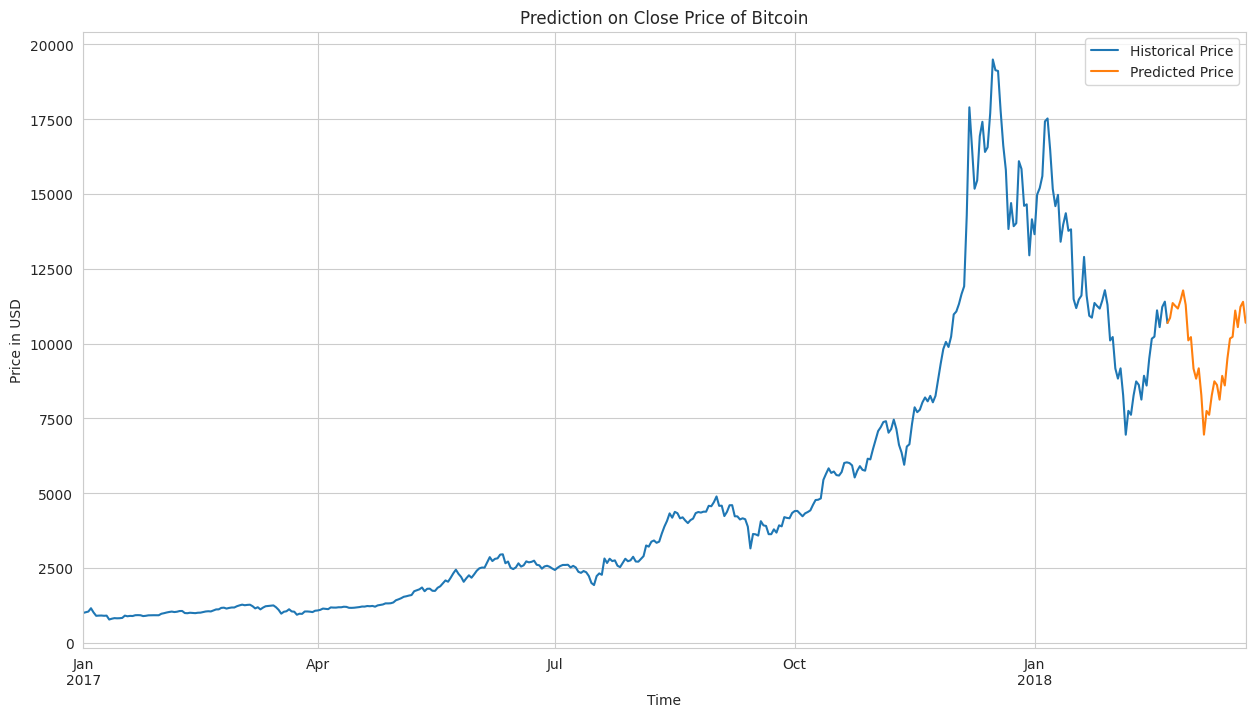

In [55]:
plt.figure(figsize=(15,8))
(bitcoin[:-30]['close']).plot(label='Historical Price')
(bitcoin[-31:]['close']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Close Price of Bitcoin')
plt.legend()
plt.show()


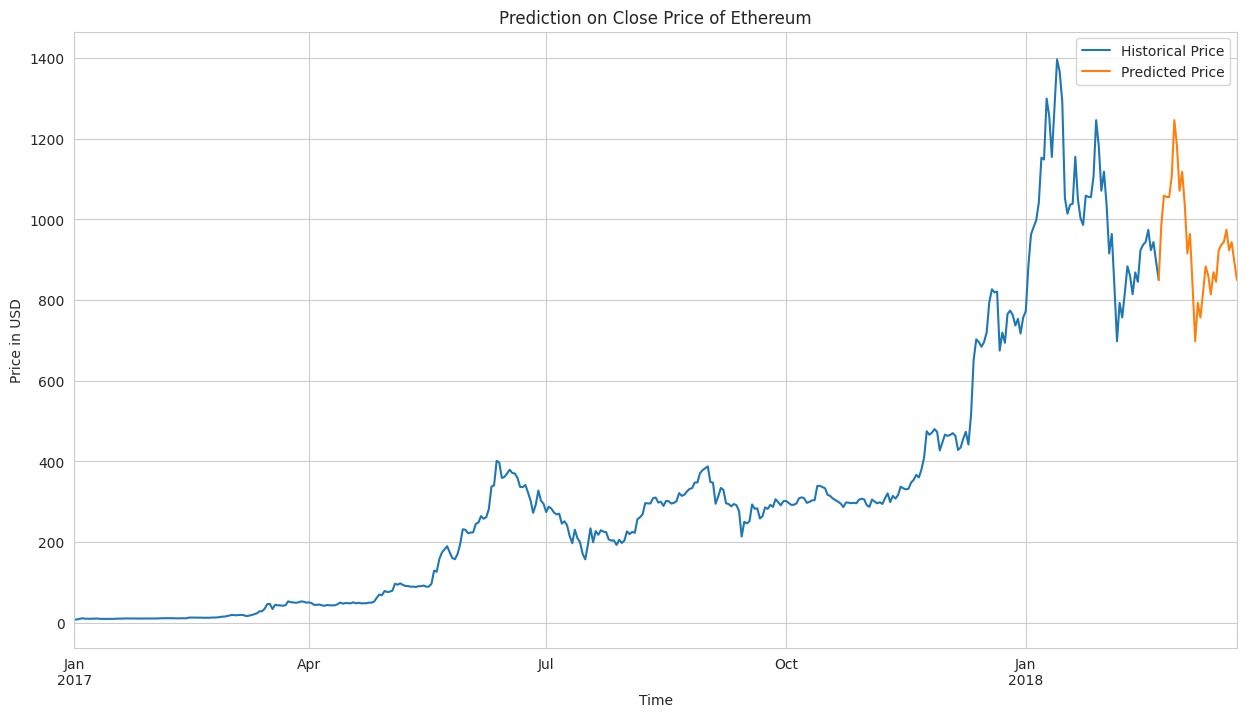

In [56]:
plt.figure(figsize=(15,8))
(ethereum[:-30]['close']).plot(label='Historical Price')
(ethereum[-31:]['close']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Close Price of Ethereum')
plt.legend()
plt.show()


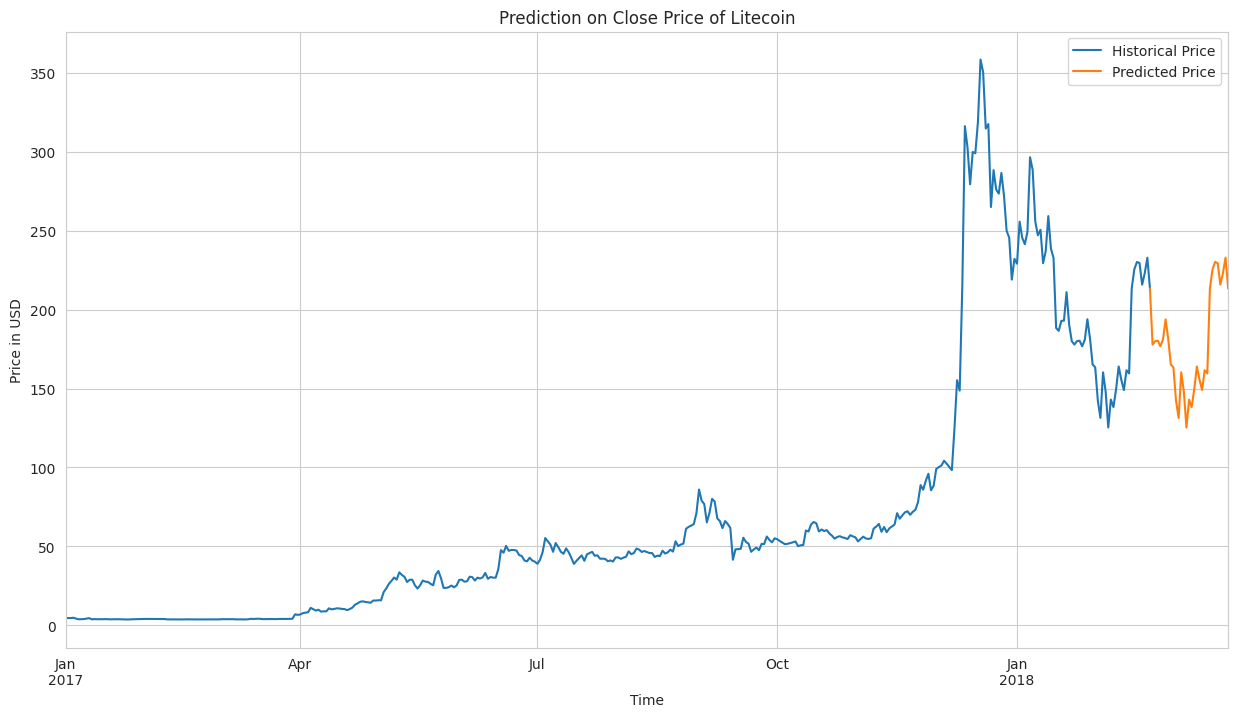

In [57]:
plt.figure(figsize=(15,8))
(litecoin[:-30]['close']).plot(label='Historical Price')
(litecoin[-31:]['close']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Close Price of Litecoin')
plt.legend()
plt.show()


# **NEURAL NETWORKS**

###### **The neural networks portion of the code may take around 30-45 minutes to fully execute, so sit tight and grab a cup of coffee while the intricate computations unfold behind the scenes!!**

In our analysis, we have sequentially applied neural network models to Bitcoin, Ethereum, and Litecoin. As you go through the results, you will first see three models fitted on Bitcoin, followed by three models fitted on Ethereum, and finally, three models fitted on Litecoin. This structured approach allows us to systematically examine and compare the performance of the models across these three major cryptocurrencies.

In [58]:
pip install keras-tcn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 9.7 MB/s eta 0:00:00


In [59]:
!pip install tensorflow-gpu==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: google-auth-oauthlib
    Fo

In [60]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8


# **Data Pre-process**

In [61]:
scaler = MinMaxScaler()

close_price = bitcoin.close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [62]:
scaled_close.shape

(447, 1)

In [63]:
np.isnan(scaled_close).any()

False

In [64]:
scaled_close = scaled_close[~np.isnan(scaled_close)]

In [65]:
scaled_close = scaled_close.reshape(-1, 1)

In [66]:
np.isnan(scaled_close).any()

False

# BITCOIN

In [67]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

# **Bi-Directional LSTM**

In [68]:
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

DROPOUT = 0.3
L2_REG = 1e-4
WINDOW_SIZE = SEQ_LEN - 1
LEARNING_RATE = 1e-3

model = keras.Sequential()

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True, kernel_regularizer=l2(L2_REG)),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True, kernel_regularizer=l2(L2_REG))))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False, kernel_regularizer=l2(L2_REG))))

model.add(Dense(units=1, kernel_regularizer=l2(L2_REG)))

model.add(Activation('linear'))

optimizer = Adam(lr=LEARNING_RATE)
model.compile(loss='mean_squared_error', optimizer=optimizer)

BATCH_SIZE = 64
EPOCHS = 100

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Add learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
5/5 [==============================] - 50s 5s/step - loss: 0.1563 - val_loss: 0.2275 - lr: 0.0010
Epoch 2/100
5/5 [==============================] - 13s 2s/step - loss: 0.1385 - val_loss: 0.1402 - lr: 0.0010
Epoch 3/100
5/5 [==============================] - 8s 2s/step - loss: 0.1842 - val_loss: 0.1403 - lr: 0.0010
Epoch 4/100
5/5 [==============================] - 11s 2s/step - loss: 0.1044 - val_loss: 0.1053 - lr: 0.0010
Epoch 5/100
5/5 [==============================] - 10s 2s/step - loss: 0.0957 - val_loss: 0.0882 - lr: 0.0010
Epoch 6/100
5/5 [==============================] - 9s 2s/step - loss: 0.0804 - val_loss: 0.0813 - lr: 0.0010
Epoch 7/100
5/5 [==============================] - 11s 2s/step - loss: 0.0720 - val_loss: 0.0707 - lr: 0.0010
Epoch 8/100
5/5 [==============================] - 8s 2s/step - loss: 0.0657 - val_loss: 0.0635 - lr: 0.0010
Epoch 9/100
5/5 [==============================] - 11s 2s/step - loss: 0.0592 - val_loss: 0.0605 - lr: 0.0010
Epoch 10/100


In [69]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 183ms/step - loss: 0.0379


0.03788177669048309

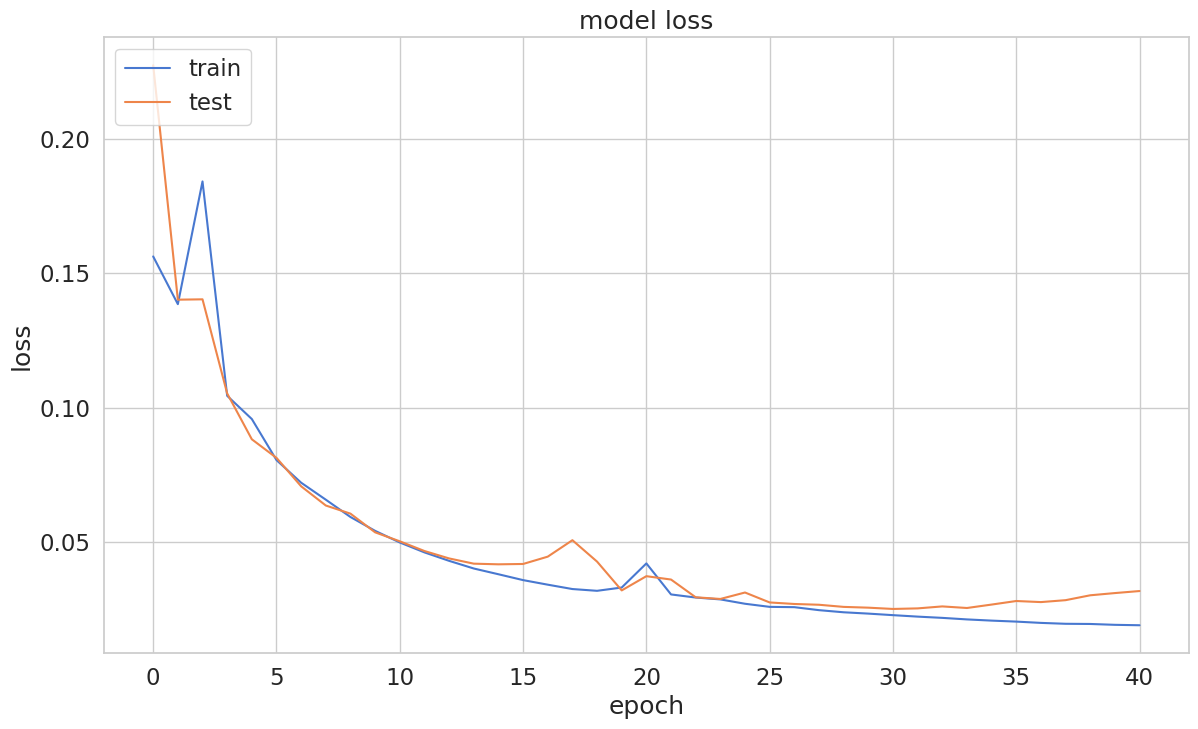

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

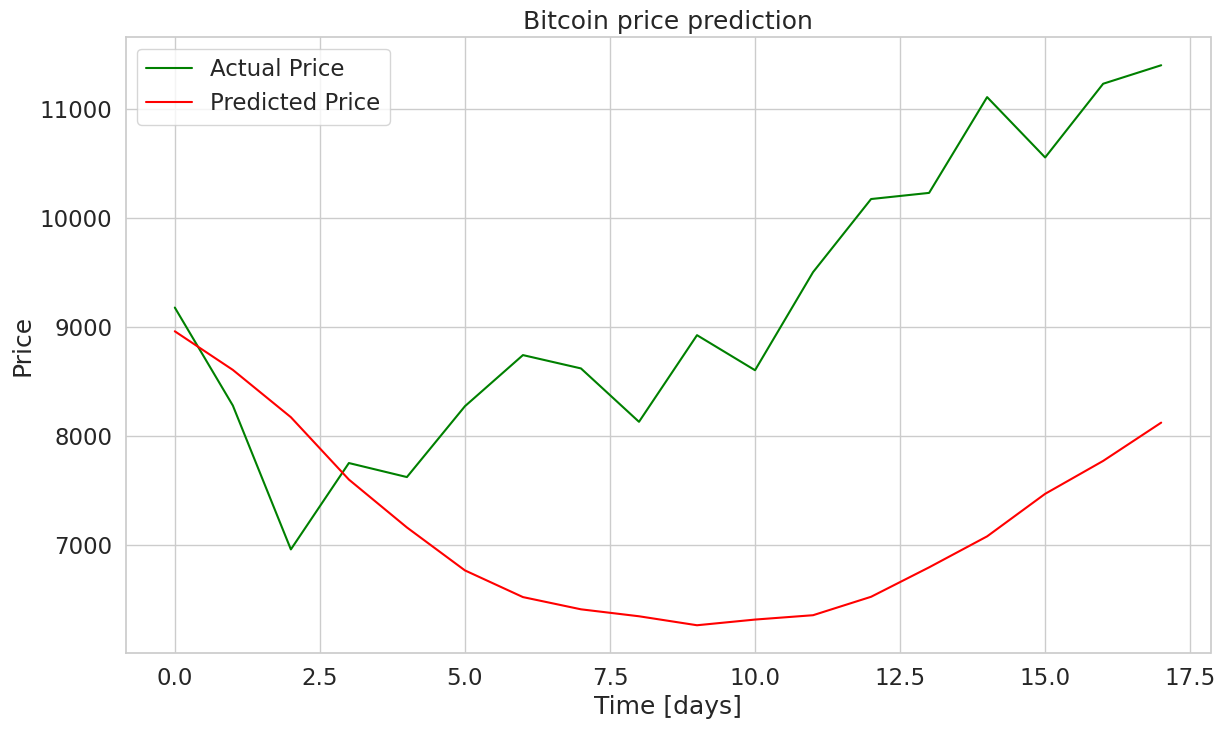

In [71]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [72]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Make predictions on test data
y_pred = model.predict(X_test)

# Assuming `y_test_scaled` are the scaled actual values and `y_pred_scaled` are the scaled predictions
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calculate the mean squared error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE: ", rmse)


RMSE:  2503.8789458769816


# **GRU(Gated Recurrent Unit)**

In [73]:
import keras
from keras.layers import Bidirectional, GRU, Dropout, Dense, Activation

DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

gru_model = keras.Sequential()

gru_model.add(Bidirectional(GRU(WINDOW_SIZE, return_sequences=True),
                            input_shape=(WINDOW_SIZE, X_train.shape[-1])))
gru_model.add(Dropout(rate=DROPOUT))

gru_model.add(Bidirectional(GRU((WINDOW_SIZE * 2), return_sequences=True)))
gru_model.add(Dropout(rate=DROPOUT))

gru_model.add(Bidirectional(GRU(WINDOW_SIZE, return_sequences=False)))

gru_model.add(Dense(units=1))

gru_model.add(Activation('linear'))

gru_model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

BATCH_SIZE = 64

gru_history = gru_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)


Epoch 1/50
5/5 [==============================] - 27s 3s/step - loss: 0.0163 - val_loss: 0.1297
Epoch 2/50
5/5 [==============================] - 8s 1s/step - loss: 0.0393 - val_loss: 0.0099
Epoch 3/50
5/5 [==============================] - 11s 2s/step - loss: 0.0753 - val_loss: 0.0588
Epoch 4/50
5/5 [==============================] - 8s 2s/step - loss: 0.0046 - val_loss: 0.0123
Epoch 5/50
5/5 [==============================] - 10s 2s/step - loss: 0.0162 - val_loss: 0.0039
Epoch 6/50
5/5 [==============================] - 10s 2s/step - loss: 0.0192 - val_loss: 0.0194
Epoch 7/50
5/5 [==============================] - 8s 2s/step - loss: 0.0035 - val_loss: 0.0048
Epoch 8/50
5/5 [==============================] - 11s 2s/step - loss: 0.0053 - val_loss: 0.0046
Epoch 9/50
5/5 [==============================] - 7s 1s/step - loss: 0.0030 - val_loss: 0.0056
Epoch 10/50
5/5 [==============================] - 11s 2s/step - loss: 0.0035 - val_loss: 0.0034
Epoch 11/50
5/5 [==========================

In [74]:
gru_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 206ms/step - loss: 0.0021


0.0020987456664443016

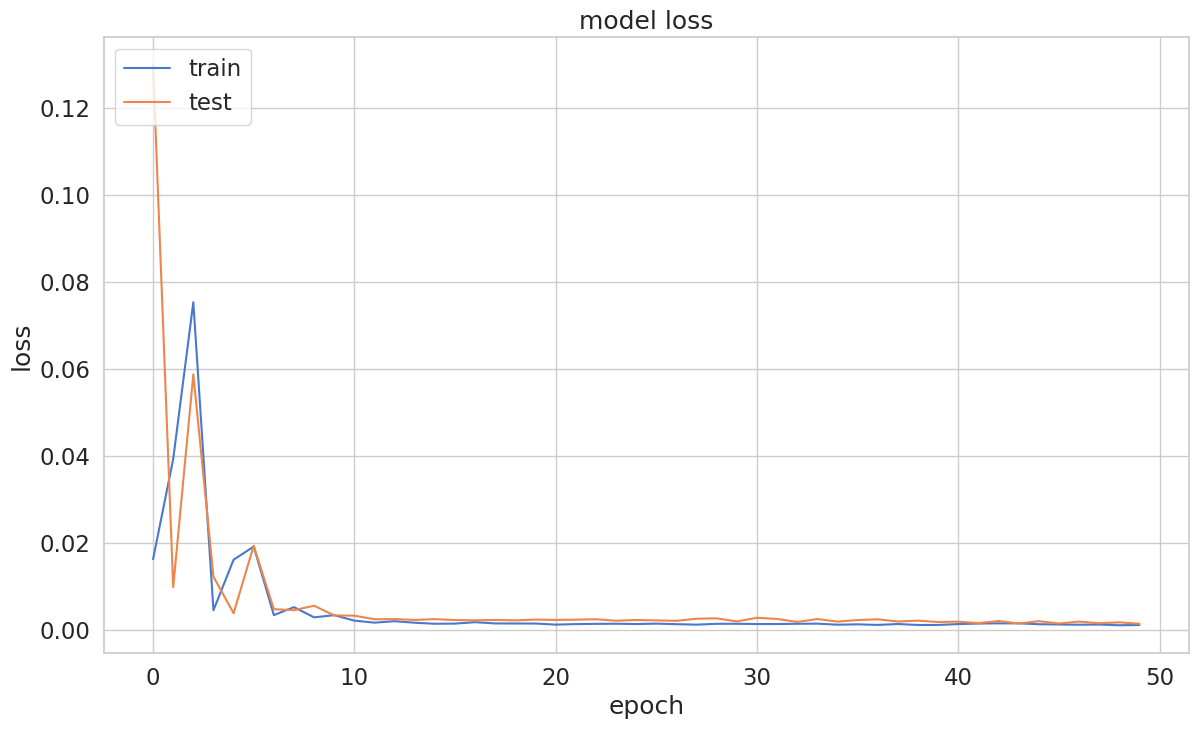

In [75]:
plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

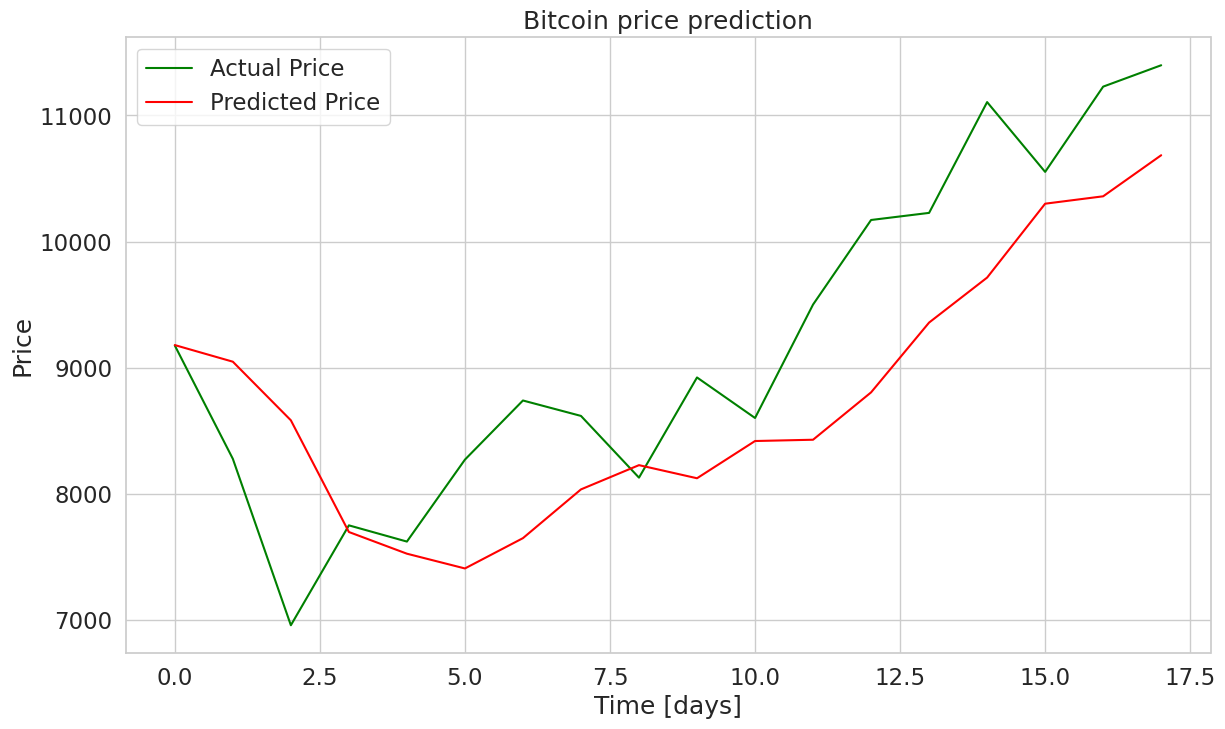

In [76]:
y_hat = gru_model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [77]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Make predictions on test data
y_pred = gru_model.predict(X_test)

# Assuming `y_test_scaled` are the scaled actual values and `y_pred_scaled` are the scaled predictions
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calculate the mean squared error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE: ", rmse)


RMSE:  857.5855059774005


# **Temporal Convolutional Networks (TCN)**

In [78]:
import keras
from keras.layers import Dropout, Dense, Activation
from tcn import TCN

DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

tcn_model = keras.Sequential()

tcn_model.add(TCN(nb_filters=WINDOW_SIZE, kernel_size=2, return_sequences=False,
                  dilations=[1, 2, 4, 8, 16, 32], padding='causal',
                  input_shape=(WINDOW_SIZE, X_train.shape[-1])))
tcn_model.add(Dropout(rate=DROPOUT))

tcn_model.add(Dense(units=1))

tcn_model.add(Activation('linear'))

tcn_model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

BATCH_SIZE = 64

tcn_history = tcn_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
5/5 [==============================] - 5s 456ms/step - loss: 7.4881 - val_loss: 7.1135
Epoch 2/50
5/5 [==============================] - 2s 337ms/step - loss: 10.5056 - val_loss: 1.7841
Epoch 3/50
5/5 [==============================] - 2s 337ms/step - loss: 7.8585 - val_loss: 3.2713
Epoch 4/50
5/5 [==============================] - 2s 335ms/step - loss: 5.2045 - val_loss: 4.6945
Epoch 5/50
5/5 [==============================] - 2s 367ms/step - loss: 1.4773 - val_loss: 2.0844
Epoch 6/50
5/5 [==============================] - 3s 615ms/step - loss: 0.9635 - val_loss: 1.9122
Epoch 7/50
5/5 [==============================] - 3s 562ms/step - loss: 0.8478 - val_loss: 1.1382
Epoch 8/50
5/5 [==============================] - 2s 347ms/step - loss: 0.5008 - val_loss: 0.6431
Epoch 9/50
5/5 [==============================] - 2s 335ms/step - loss: 0.4075 - val_loss: 0.7730
Epoch 10/50
5/5 [==============================] - 2s 344ms/step - loss: 0.4120 - val_loss: 0.3513
Epoch 11/50
5/5 [=

In [79]:
tcn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 58ms/step - loss: 0.0433


0.043292876332998276

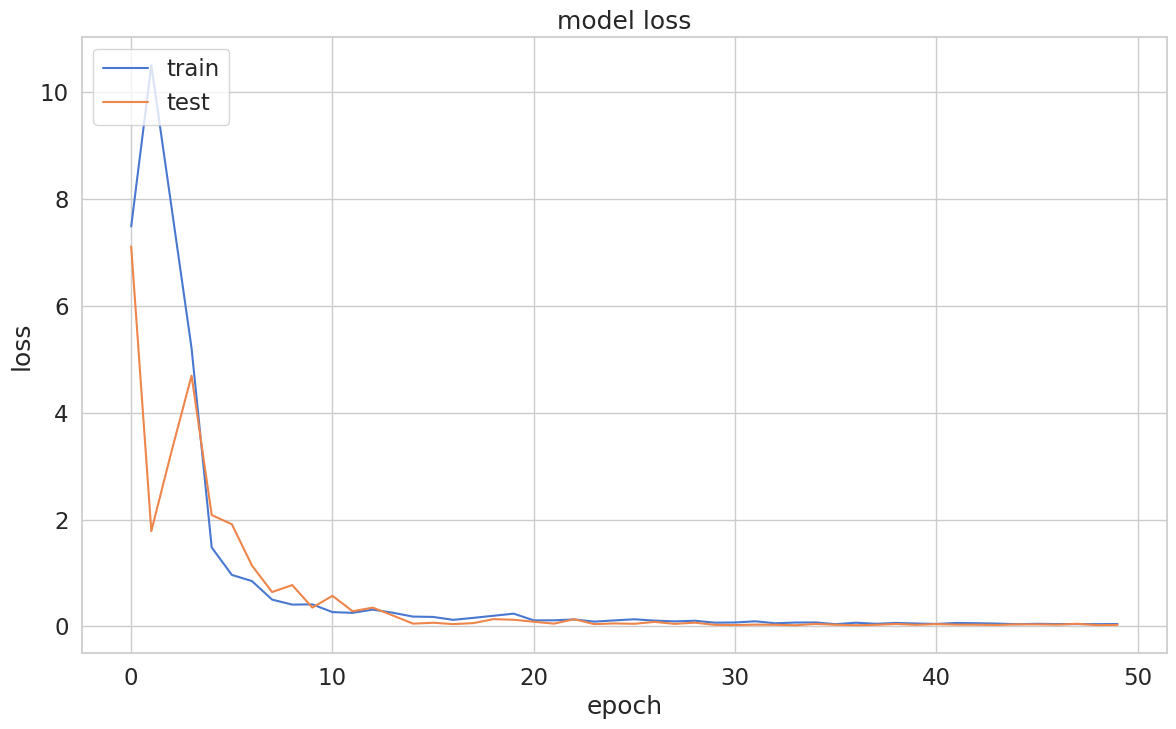

In [80]:
plt.plot(tcn_history.history['loss'])
plt.plot(tcn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

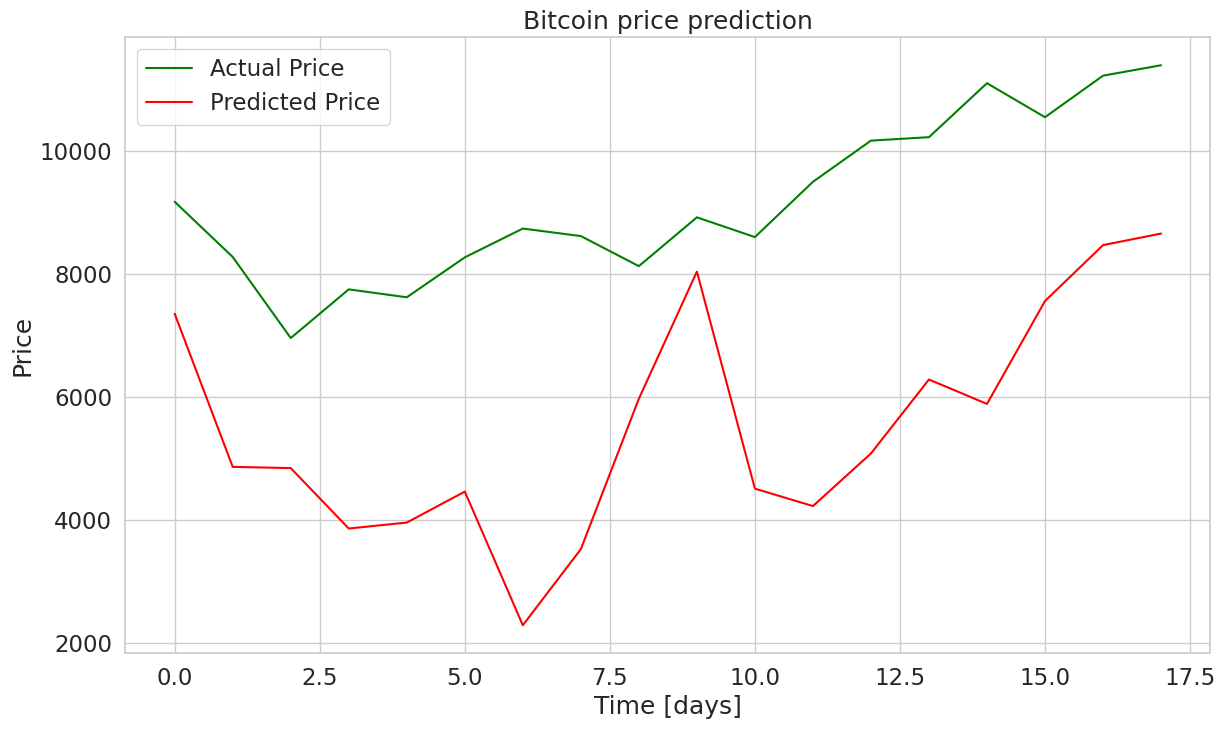

In [81]:
y_hat = tcn_model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [82]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Make predictions on test data
y_pred = tcn_model.predict(X_test)

# Assuming `y_test_scaled` are the scaled actual values and `y_pred_scaled` are the scaled predictions
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calculate the mean squared error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE: ", rmse)


RMSE:  3894.9845434707304


# **Ensemble Models**

We are ensembling BiLSTM and GRU neural networks to enhance predictive performance by averaging their predictions. This experiment aims to leverage the strengths of both models and potentially achieve better results compared to using a single model.

In [83]:
import numpy as np
from keras.models import load_model


#Saving Models
gru_model.save("gru_model2.h5")
model.save("bilstm_model.h5")

# Assuming your models are saved as "bilstm_model.h5" and "gru_model.h5"
bilstm_model = load_model("/content/bilstm_model.h5")
gru_model = load_model("/content/gru_model2.h5")

# Make predictions using both models
bilstm_predictions = bilstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

# Combine predictions (e.g., averaging)
ensemble_predictions = (bilstm_predictions + gru_predictions) / 2

y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
ensemble_predictions_inverse = scaler.inverse_transform(ensemble_predictions.reshape(-1, 1))

# Calculate performance metric (e.g., RMSE)
rmse = np.sqrt(np.mean((y_test_inverse - ensemble_predictions_inverse)**2))
print("Ensemble RMSE:", rmse)

Ensemble RMSE: 1630.9470645468136


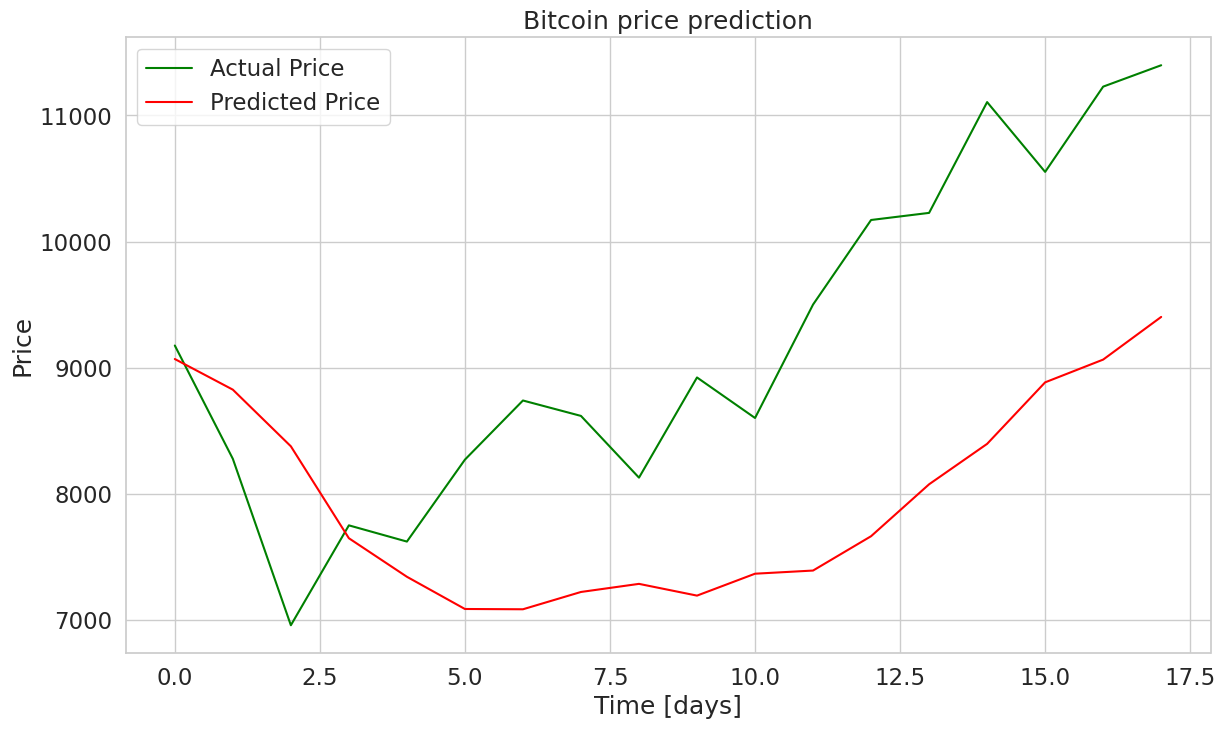

In [84]:
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(ensemble_predictions_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

# **MODEL BUILDING**
# ETHEREUM

In [85]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8


scaler = MinMaxScaler()

close_price = ethereum.close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

scaled_close.shape

np.isnan(scaled_close).any()

scaled_close = scaled_close[~np.isnan(scaled_close)]

scaled_close = scaled_close.reshape(-1, 1)

np.isnan(scaled_close).any()

False

In [86]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

# **Bi-LSTM**

In [87]:
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

DROPOUT = 0.3
L2_REG = 1e-4
WINDOW_SIZE = SEQ_LEN - 1
LEARNING_RATE = 1e-3

model = keras.Sequential()

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True, kernel_regularizer=l2(L2_REG)),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True, kernel_regularizer=l2(L2_REG))))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False, kernel_regularizer=l2(L2_REG))))

model.add(Dense(units=1, kernel_regularizer=l2(L2_REG)))

model.add(Activation('linear'))

optimizer = Adam(lr=LEARNING_RATE)
model.compile(loss='mean_squared_error', optimizer=optimizer)

BATCH_SIZE = 64
EPOCHS = 50

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Add learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
5/5 [==============================] - 24s 2s/step - loss: 0.1626 - val_loss: 0.1401 - lr: 0.0010
Epoch 2/50
5/5 [==============================] - 11s 2s/step - loss: 0.1361 - val_loss: 0.1240 - lr: 0.0010
Epoch 3/50
5/5 [==============================] - 11s 2s/step - loss: 0.1280 - val_loss: 0.1150 - lr: 0.0010
Epoch 4/50
5/5 [==============================] - 8s 2s/step - loss: 0.1109 - val_loss: 0.1228 - lr: 0.0010
Epoch 5/50
5/5 [==============================] - 11s 2s/step - loss: 0.1014 - val_loss: 0.1267 - lr: 0.0010
Epoch 6/50
5/5 [==============================] - 9s 2s/step - loss: 0.0842 - val_loss: 0.0822 - lr: 0.0010
Epoch 7/50
5/5 [==============================] - 10s 2s/step - loss: 0.0772 - val_loss: 0.0866 - lr: 0.0010
Epoch 8/50
5/5 [==============================] - 11s 2s/step - loss: 0.0679 - val_loss: 0.0687 - lr: 0.0010
Epoch 9/50
5/5 [==============================] - 8s 2s/step - loss: 0.0609 - val_loss: 0.0652 - lr: 0.0010
Epoch 10/50
5/5 [=====

In [88]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 397ms/step - loss: 0.0209


0.0209153201431036

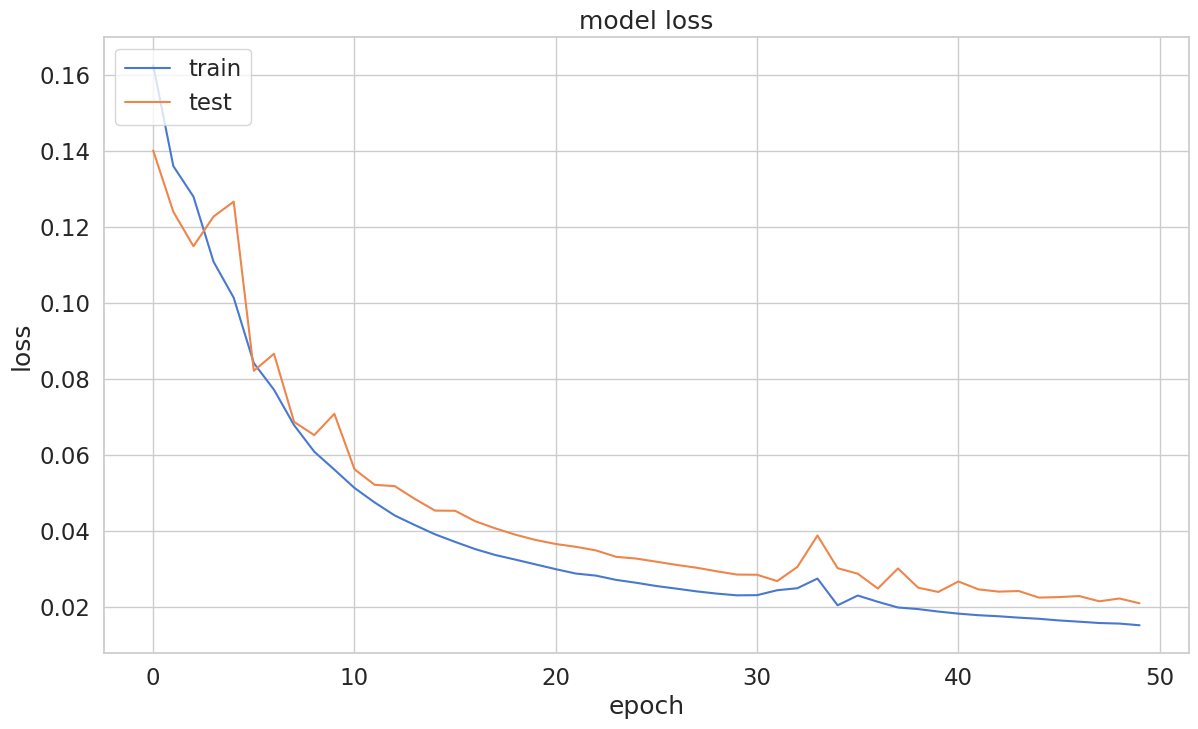

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

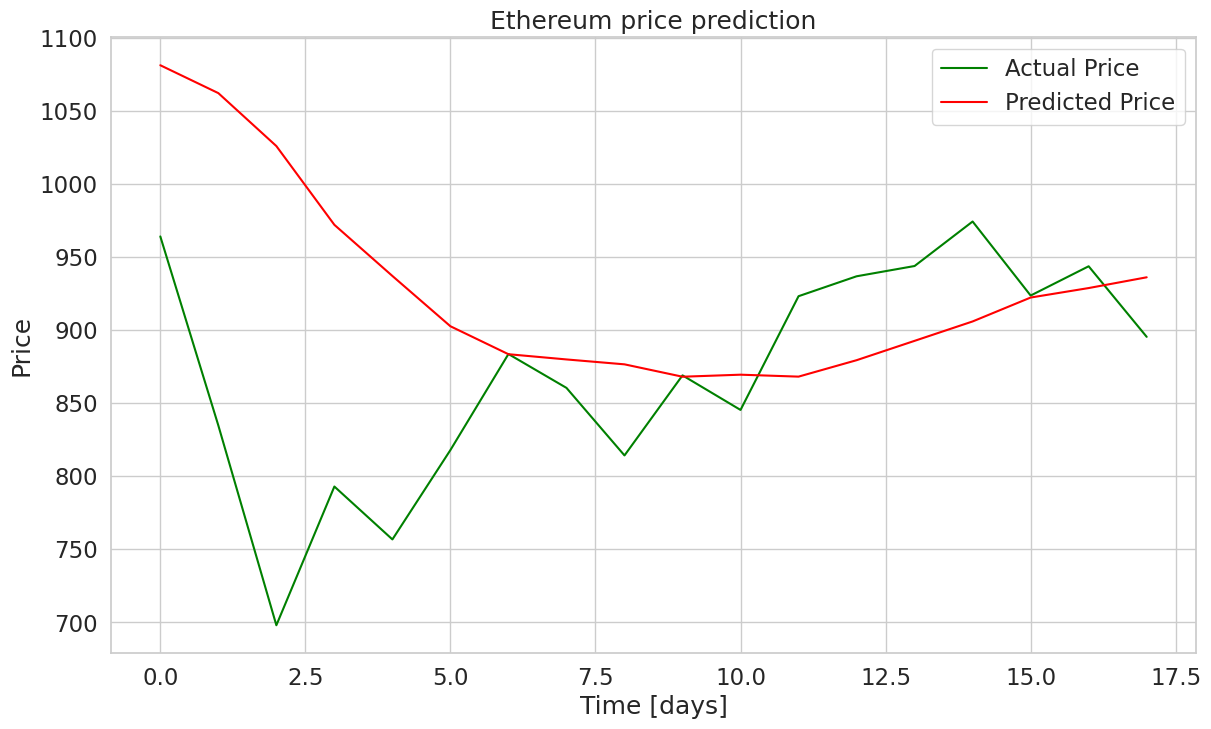

In [90]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Ethereum price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [91]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Make predictions on test data
y_pred = model.predict(X_test)

# Assuming `y_test_scaled` are the scaled actual values and `y_pred_scaled` are the scaled predictions
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calculate the mean squared error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE: ", rmse)


RMSE:  121.34738683723583


# **GRU(GATED RECURRENT UNIT)**

In [92]:
import keras
from keras.layers import Bidirectional, GRU, Dropout, Dense, Activation

DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

gru_model = keras.Sequential()

gru_model.add(Bidirectional(GRU(WINDOW_SIZE, return_sequences=True),
                            input_shape=(WINDOW_SIZE, X_train.shape[-1])))
gru_model.add(Dropout(rate=DROPOUT))

gru_model.add(Bidirectional(GRU((WINDOW_SIZE * 2), return_sequences=True)))
gru_model.add(Dropout(rate=DROPOUT))

gru_model.add(Bidirectional(GRU(WINDOW_SIZE, return_sequences=False)))

gru_model.add(Dense(units=1))

gru_model.add(Activation('linear'))

gru_model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

BATCH_SIZE = 64

gru_history = gru_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)


Epoch 1/50
5/5 [==============================] - 24s 3s/step - loss: 0.0234 - val_loss: 0.0176
Epoch 2/50
5/5 [==============================] - 8s 2s/step - loss: 0.0087 - val_loss: 0.0074
Epoch 3/50
5/5 [==============================] - 12s 3s/step - loss: 0.0145 - val_loss: 0.0214
Epoch 4/50
5/5 [==============================] - 11s 2s/step - loss: 0.0036 - val_loss: 0.0198
Epoch 5/50
5/5 [==============================] - 10s 2s/step - loss: 0.0029 - val_loss: 0.0057
Epoch 6/50
5/5 [==============================] - 11s 2s/step - loss: 0.0030 - val_loss: 0.0060
Epoch 7/50
5/5 [==============================] - 8s 2s/step - loss: 0.0018 - val_loss: 0.0097
Epoch 8/50
5/5 [==============================] - 11s 2s/step - loss: 0.0014 - val_loss: 0.0055
Epoch 9/50
5/5 [==============================] - 8s 2s/step - loss: 0.0014 - val_loss: 0.0055
Epoch 10/50
5/5 [==============================] - 11s 2s/step - loss: 0.0017 - val_loss: 0.0072
Epoch 11/50
5/5 [=========================

In [93]:
gru_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 177ms/step - loss: 0.0027


0.0027057924307882786

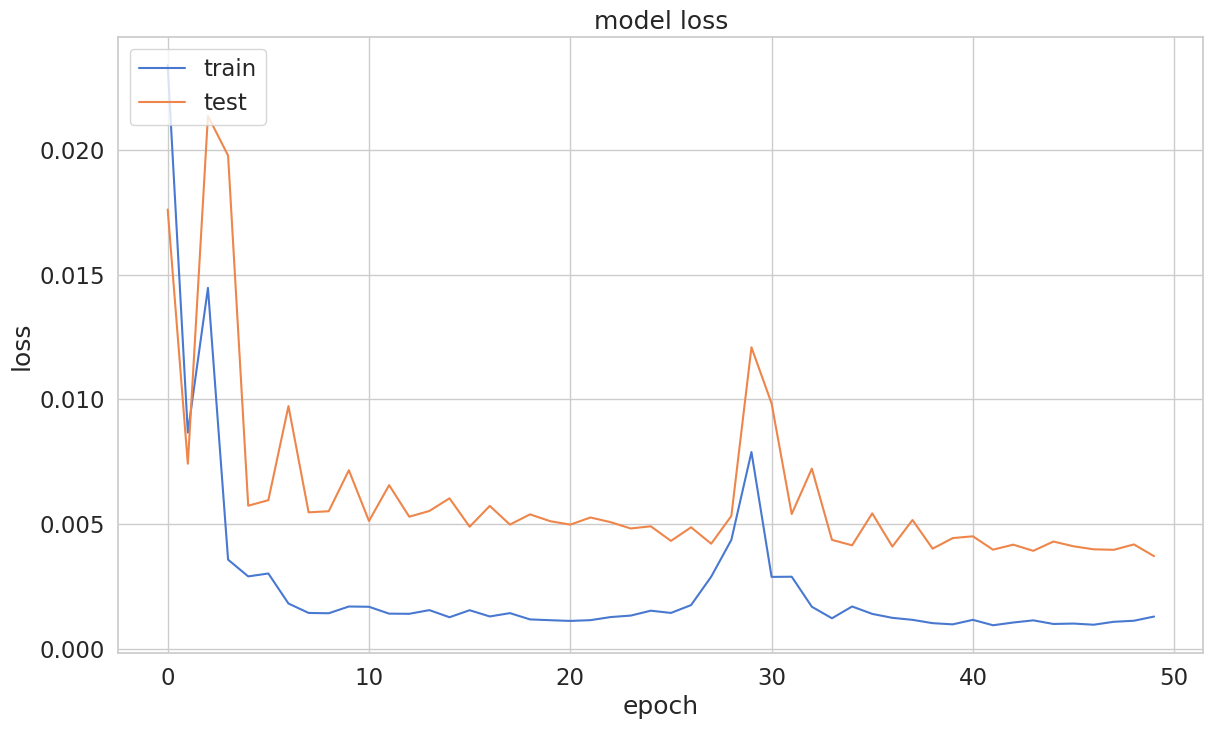

In [94]:
plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

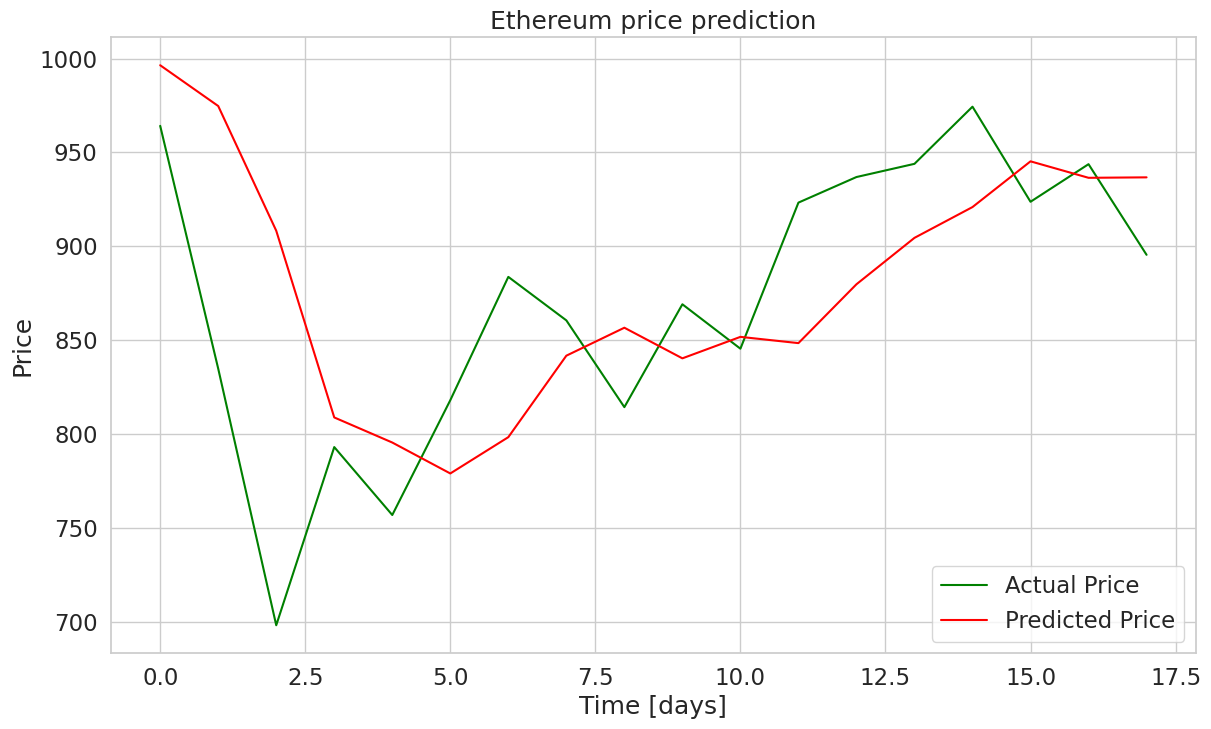

In [95]:
y_hat = gru_model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Ethereum price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [96]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Make predictions on test data
y_pred = gru_model.predict(X_test)

# Assuming `y_test_scaled` are the scaled actual values and `y_pred_scaled` are the scaled predictions
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calculate the mean squared error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE: ", rmse)


RMSE:  72.21290799282183


# **Temporal Convolutional Networks (TCN)**

In [97]:
import keras
from keras.layers import Dropout, Dense, Activation
from tcn import TCN

DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

tcn_model = keras.Sequential()

tcn_model.add(TCN(nb_filters=WINDOW_SIZE, kernel_size=2, return_sequences=False,
                  dilations=[1, 2, 4, 8, 16, 32], padding='causal',
                  input_shape=(WINDOW_SIZE, X_train.shape[-1])))
tcn_model.add(Dropout(rate=DROPOUT))

tcn_model.add(Dense(units=1))

tcn_model.add(Activation('linear'))

tcn_model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

BATCH_SIZE = 64

tcn_history = tcn_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
5/5 [==============================] - 8s 474ms/step - loss: 4.2661 - val_loss: 20.3133
Epoch 2/50
5/5 [==============================] - 2s 348ms/step - loss: 3.3734 - val_loss: 17.5148
Epoch 3/50
5/5 [==============================] - 2s 342ms/step - loss: 2.6343 - val_loss: 0.2005
Epoch 4/50
5/5 [==============================] - 2s 348ms/step - loss: 3.0292 - val_loss: 3.8084
Epoch 5/50
5/5 [==============================] - 2s 349ms/step - loss: 0.3881 - val_loss: 0.5580
Epoch 6/50
5/5 [==============================] - 2s 437ms/step - loss: 0.2740 - val_loss: 0.0549
Epoch 7/50
5/5 [==============================] - 3s 630ms/step - loss: 0.2170 - val_loss: 0.0354
Epoch 8/50
5/5 [==============================] - 3s 497ms/step - loss: 0.3495 - val_loss: 0.4553
Epoch 9/50
5/5 [==============================] - 2s 350ms/step - loss: 0.1924 - val_loss: 0.0909
Epoch 10/50
5/5 [==============================] - 2s 349ms/step - loss: 0.1353 - val_loss: 0.0630
Epoch 11/50
5/5 [

In [98]:
tcn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 55ms/step - loss: 0.0104


0.010381895117461681

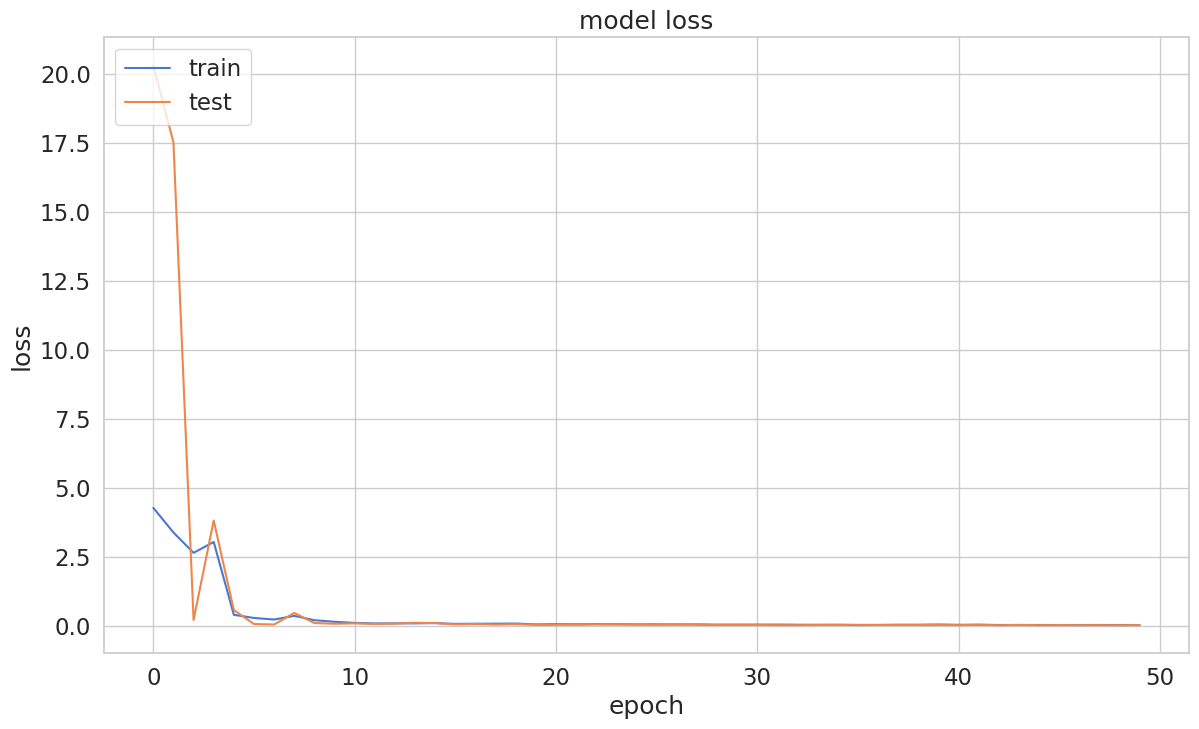

In [99]:
plt.plot(tcn_history.history['loss'])
plt.plot(tcn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

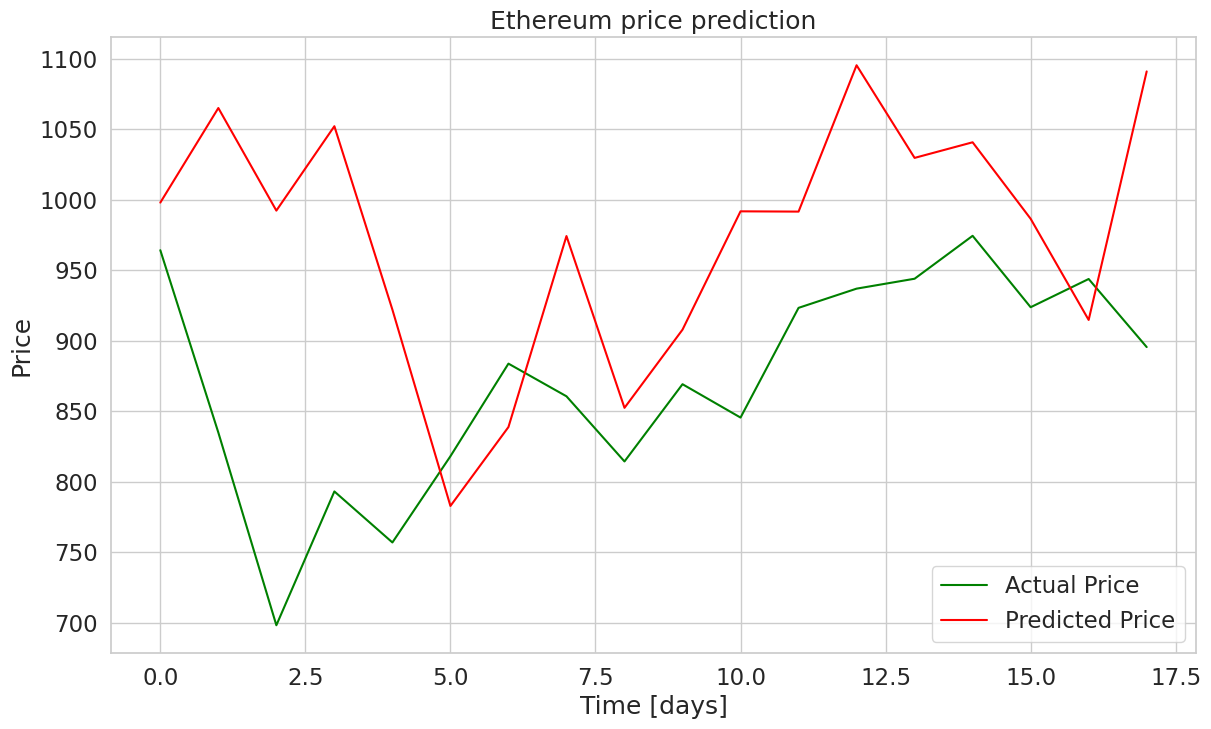

In [100]:
y_hat = tcn_model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Ethereum price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [101]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Make predictions on test data
y_pred = tcn_model.predict(X_test)

# Assuming `y_test_scaled` are the scaled actual values and `y_pred_scaled` are the scaled predictions
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calculate the mean squared error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE: ", rmse)


RMSE:  141.45101221750224


# **Ensembling**

We are ensembling BiLSTM and GRU neural networks to enhance predictive performance by averaging their predictions. This experiment aims to leverage the strengths of both models and potentially achieve better results compared to using a single model.

In [102]:
import numpy as np
from keras.models import load_model

gru_model.save("gru_model2.h5")
model.save("bilstm_model.h5")

# Assuming your models are saved as "bilstm_model.h5" and "gru_model.h5"
bilstm_model = load_model("/content/bilstm_model.h5")
gru_model = load_model("/content/gru_model2.h5")

# Make predictions using both models
bilstm_predictions = bilstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

# Combine predictions (e.g., averaging)
ensemble_predictions = (bilstm_predictions + gru_predictions) / 2

y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
ensemble_predictions_inverse = scaler.inverse_transform(ensemble_predictions.reshape(-1, 1))

# Calculate performance metric (e.g., RMSE)
rmse = np.sqrt(np.mean((y_test_inverse - ensemble_predictions_inverse)**2))
print("Ensemble RMSE:", rmse)

Ensemble RMSE: 92.46007338448065


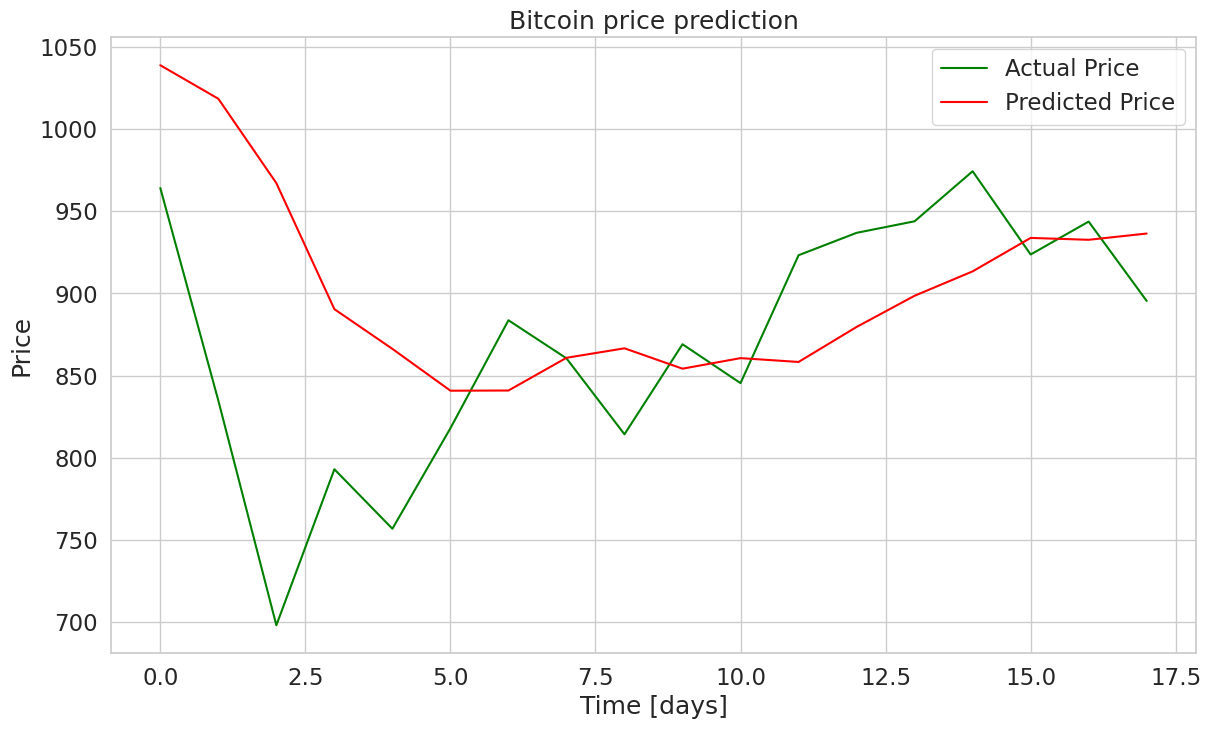

In [103]:
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(ensemble_predictions_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

# **MODEL BUILDING**
# LITECOIN

In [104]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8


scaler = MinMaxScaler()

close_price = litecoin.close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

scaled_close.shape

np.isnan(scaled_close).any()

scaled_close = scaled_close[~np.isnan(scaled_close)]

scaled_close = scaled_close.reshape(-1, 1)

np.isnan(scaled_close).any()

False

In [105]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

# **Bi-LSTM**

In [106]:
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

DROPOUT = 0.3
L2_REG = 1e-4
WINDOW_SIZE = SEQ_LEN - 1
LEARNING_RATE = 1e-3

model = keras.Sequential()

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True, kernel_regularizer=l2(L2_REG)),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True, kernel_regularizer=l2(L2_REG))))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False, kernel_regularizer=l2(L2_REG))))

model.add(Dense(units=1, kernel_regularizer=l2(L2_REG)))

model.add(Activation('linear'))

optimizer = Adam(lr=LEARNING_RATE)
model.compile(loss='mean_squared_error', optimizer=optimizer)

BATCH_SIZE = 64
EPOCHS = 100

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Add learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
5/5 [==============================] - 25s 3s/step - loss: 0.1525 - val_loss: 0.2233 - lr: 0.0010
Epoch 2/100
5/5 [==============================] - 10s 2s/step - loss: 0.1441 - val_loss: 0.1446 - lr: 0.0010
Epoch 3/100
5/5 [==============================] - 11s 2s/step - loss: 0.1519 - val_loss: 0.1385 - lr: 0.0010
Epoch 4/100
5/5 [==============================] - 8s 2s/step - loss: 0.1099 - val_loss: 0.1020 - lr: 0.0010
Epoch 5/100
5/5 [==============================] - 11s 2s/step - loss: 0.0991 - val_loss: 0.1085 - lr: 0.0010
Epoch 6/100
5/5 [==============================] - 10s 2s/step - loss: 0.0859 - val_loss: 0.0805 - lr: 0.0010
Epoch 7/100
5/5 [==============================] - 9s 2s/step - loss: 0.0747 - val_loss: 0.0779 - lr: 0.0010
Epoch 8/100
5/5 [==============================] - 11s 2s/step - loss: 0.0672 - val_loss: 0.0666 - lr: 0.0010
Epoch 9/100
5/5 [==============================] - 8s 2s/step - loss: 0.0614 - val_loss: 0.0609 - lr: 0.0010
Epoch 10/100


In [107]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 192ms/step - loss: 0.0240


0.023956291377544403

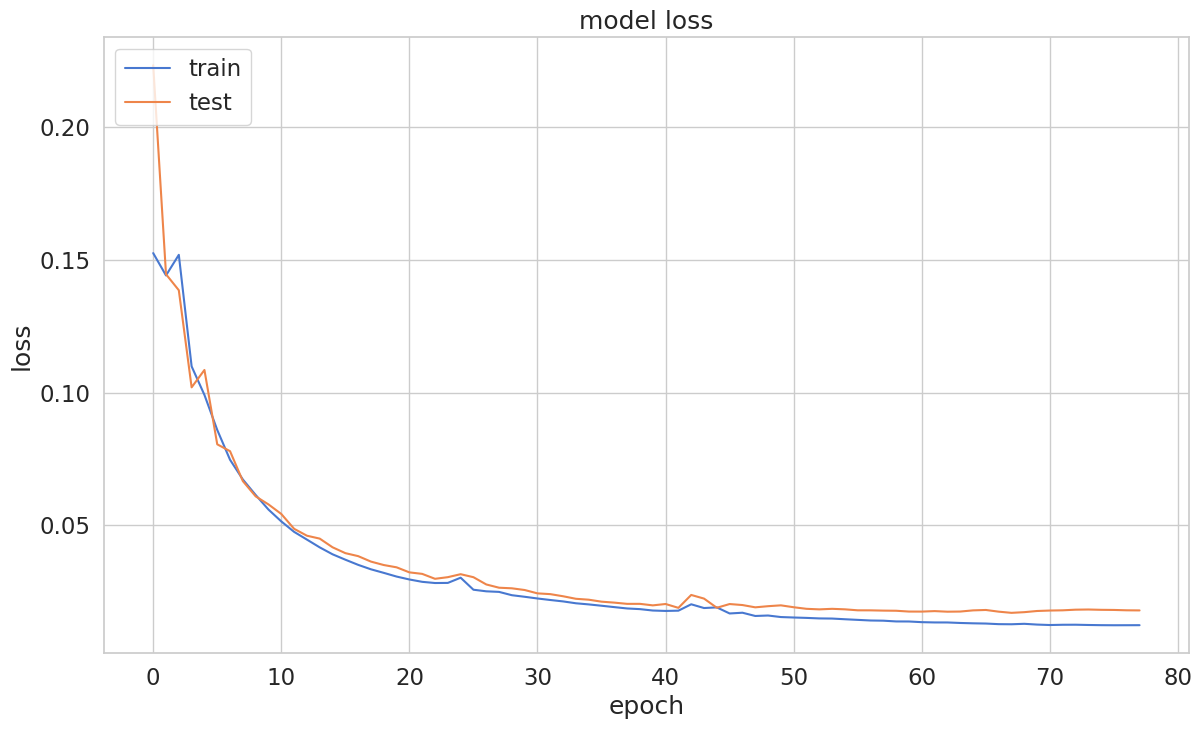

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

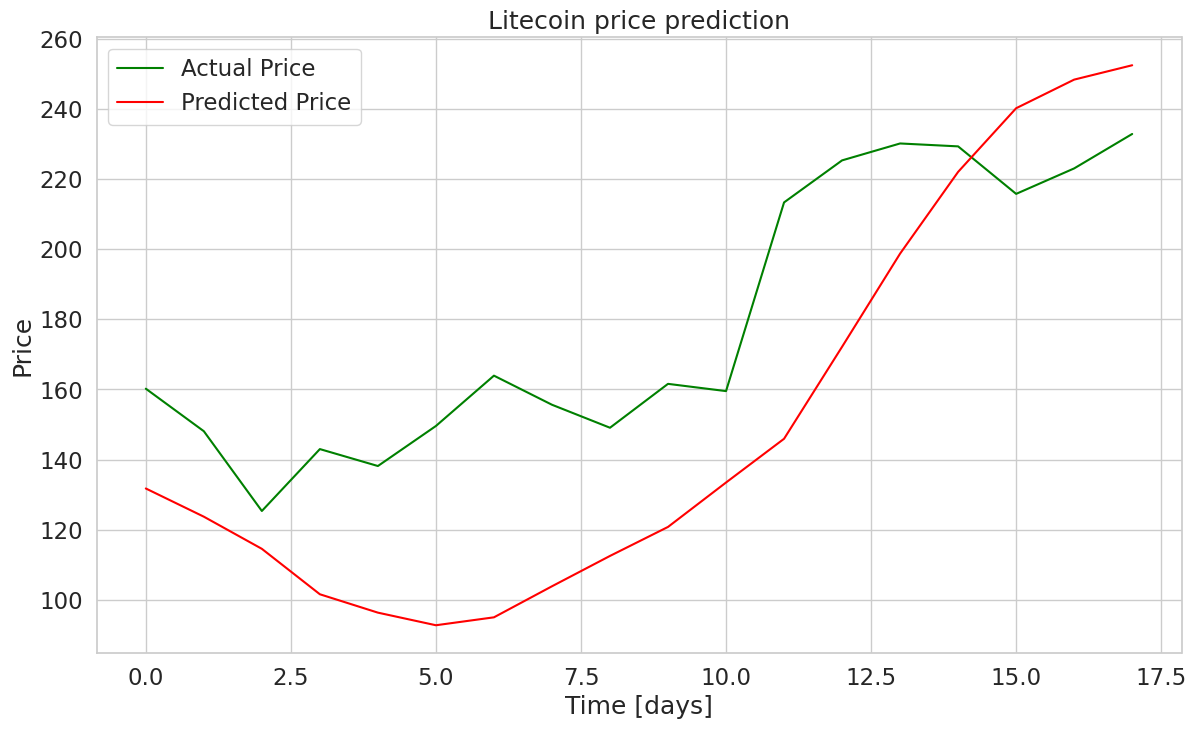

In [109]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Litecoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [110]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Make predictions on test data
y_pred = model.predict(X_test)

# Assuming `y_test_scaled` are the scaled actual values and `y_pred_scaled` are the scaled predictions
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calculate the mean squared error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE: ", rmse)


RMSE:  40.4056659901055


# **GRU(GATED RECURRENT UNIT)**

In [111]:
import keras
from keras.layers import Bidirectional, GRU, Dropout, Dense, Activation

DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

gru_model = keras.Sequential()

gru_model.add(Bidirectional(GRU(WINDOW_SIZE, return_sequences=True),
                            input_shape=(WINDOW_SIZE, X_train.shape[-1])))
gru_model.add(Dropout(rate=DROPOUT))

gru_model.add(Bidirectional(GRU((WINDOW_SIZE * 2), return_sequences=True)))
gru_model.add(Dropout(rate=DROPOUT))

gru_model.add(Bidirectional(GRU(WINDOW_SIZE, return_sequences=False)))

gru_model.add(Dense(units=1))

gru_model.add(Activation('linear'))

gru_model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

BATCH_SIZE = 64

gru_history = gru_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)


Epoch 1/50
5/5 [==============================] - 27s 3s/step - loss: 0.0158 - val_loss: 0.0288
Epoch 2/50
5/5 [==============================] - 10s 2s/step - loss: 0.0288 - val_loss: 0.0156
Epoch 3/50
5/5 [==============================] - 9s 2s/step - loss: 0.0590 - val_loss: 0.0683
Epoch 4/50
5/5 [==============================] - 11s 2s/step - loss: 0.0054 - val_loss: 0.0051
Epoch 5/50
5/5 [==============================] - 8s 2s/step - loss: 0.0134 - val_loss: 0.0063
Epoch 6/50
5/5 [==============================] - 11s 2s/step - loss: 0.0080 - val_loss: 0.0133
Epoch 7/50
5/5 [==============================] - 9s 2s/step - loss: 0.0049 - val_loss: 0.0049
Epoch 8/50
5/5 [==============================] - 9s 2s/step - loss: 0.0031 - val_loss: 0.0050
Epoch 9/50
5/5 [==============================] - 11s 2s/step - loss: 0.0034 - val_loss: 0.0052
Epoch 10/50
5/5 [==============================] - 8s 1s/step - loss: 0.0030 - val_loss: 0.0042
Epoch 11/50
5/5 [===========================

In [112]:
gru_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 191ms/step - loss: 0.0039


0.003934948705136776

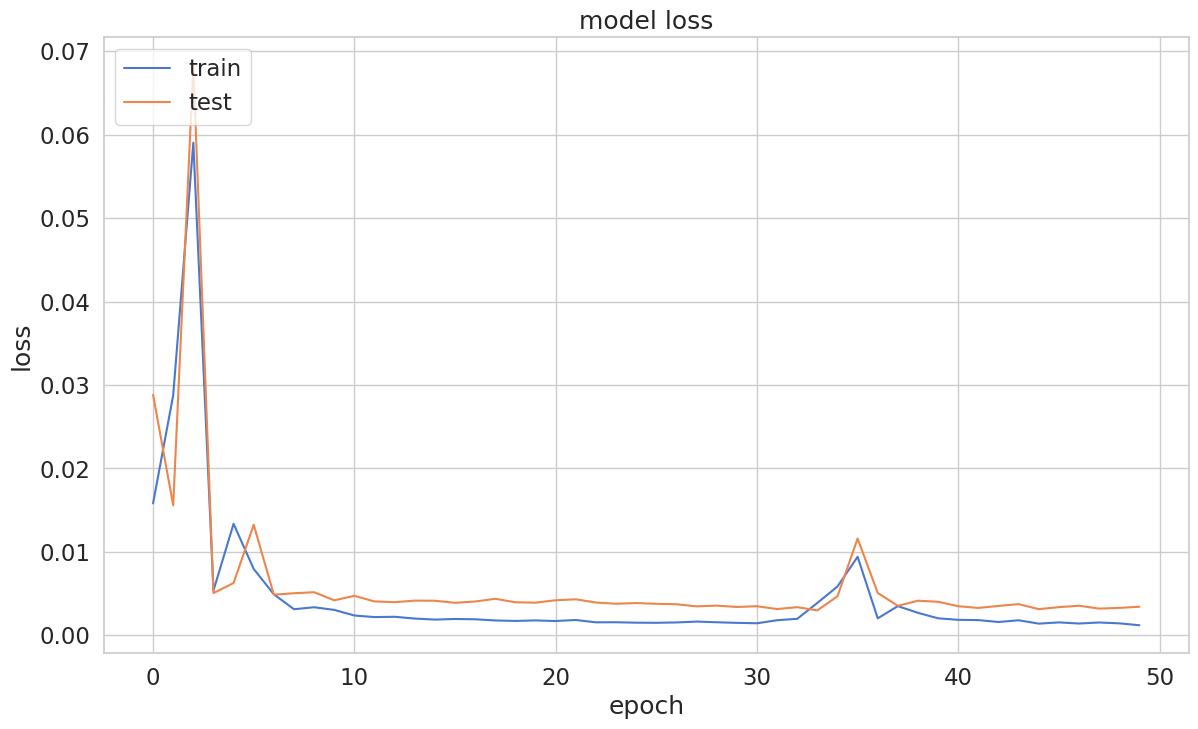

In [113]:
plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

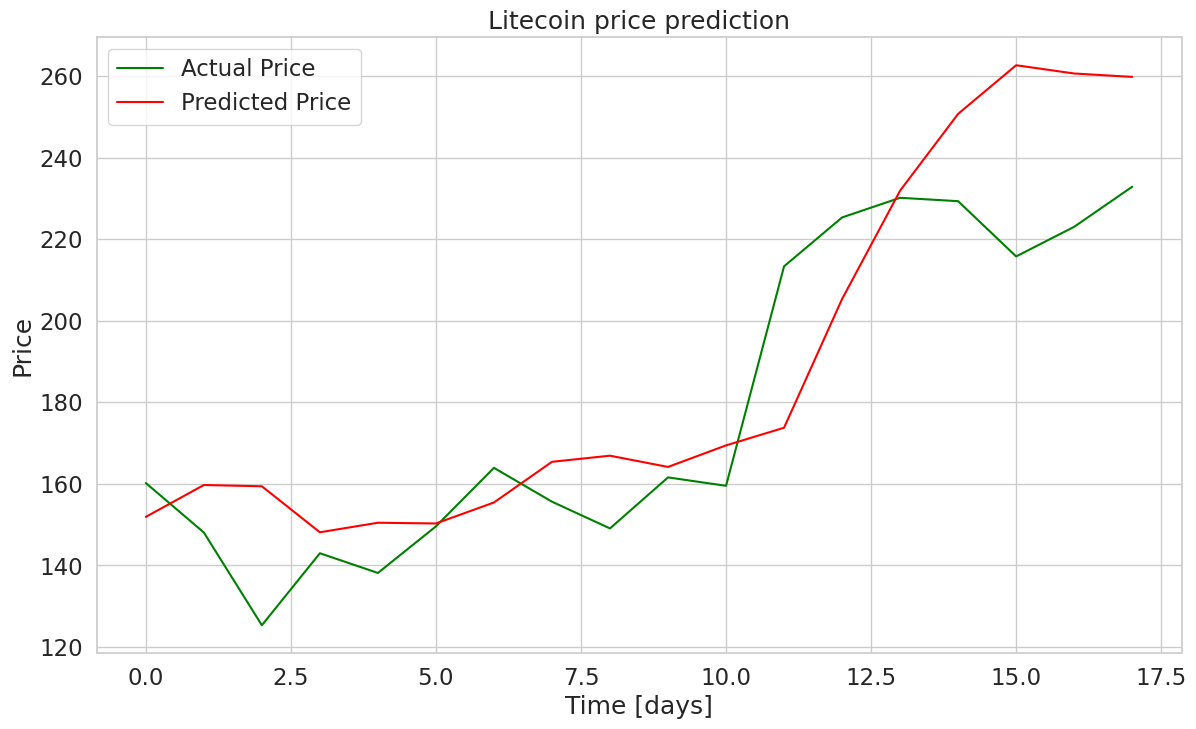

In [114]:
y_hat = gru_model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Litecoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [115]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Make predictions on test data
y_pred = gru_model.predict(X_test)

# Assuming `y_test_scaled` are the scaled actual values and `y_pred_scaled` are the scaled predictions
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calculate the mean squared error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE: ", rmse)

RMSE:  22.245642316722137


# **Temporal Convolutional Networks (TCN)**

In [116]:
import keras
from keras.layers import Dropout, Dense, Activation
from tcn import TCN

DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

tcn_model = keras.Sequential()

tcn_model.add(TCN(nb_filters=WINDOW_SIZE, kernel_size=2, return_sequences=False,
                  dilations=[1, 2, 4, 8, 16, 32], padding='causal',
                  input_shape=(WINDOW_SIZE, X_train.shape[-1])))
tcn_model.add(Dropout(rate=DROPOUT))

tcn_model.add(Dense(units=1))

tcn_model.add(Activation('linear'))

tcn_model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

BATCH_SIZE = 64

tcn_history = tcn_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
5/5 [==============================] - 5s 622ms/step - loss: 3.0416 - val_loss: 13.2834
Epoch 2/50
5/5 [==============================] - 3s 620ms/step - loss: 8.2407 - val_loss: 2.0798
Epoch 3/50
5/5 [==============================] - 2s 400ms/step - loss: 4.1494 - val_loss: 12.6241
Epoch 4/50
5/5 [==============================] - 2s 340ms/step - loss: 0.4825 - val_loss: 0.1286
Epoch 5/50
5/5 [==============================] - 2s 342ms/step - loss: 1.2910 - val_loss: 0.3213
Epoch 6/50
5/5 [==============================] - 2s 350ms/step - loss: 0.5543 - val_loss: 1.8372
Epoch 7/50
5/5 [==============================] - 2s 344ms/step - loss: 0.4312 - val_loss: 0.3233
Epoch 8/50
5/5 [==============================] - 2s 339ms/step - loss: 0.3480 - val_loss: 0.1528
Epoch 9/50
5/5 [==============================] - 3s 632ms/step - loss: 0.1990 - val_loss: 0.1458
Epoch 10/50
5/5 [==============================] - 3s 610ms/step - loss: 0.1961 - val_loss: 0.3804
Epoch 11/50
5/5 [

In [117]:
tcn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 55ms/step - loss: 0.0112


0.011225582100450993

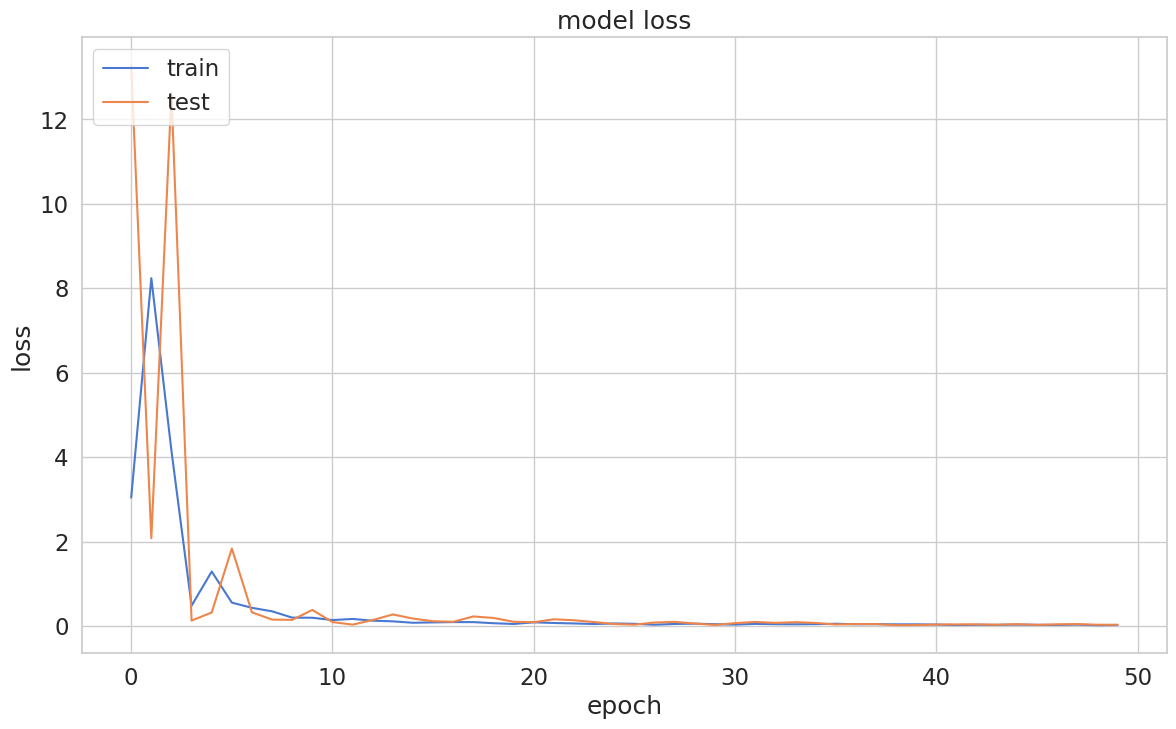

In [118]:
plt.plot(tcn_history.history['loss'])
plt.plot(tcn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

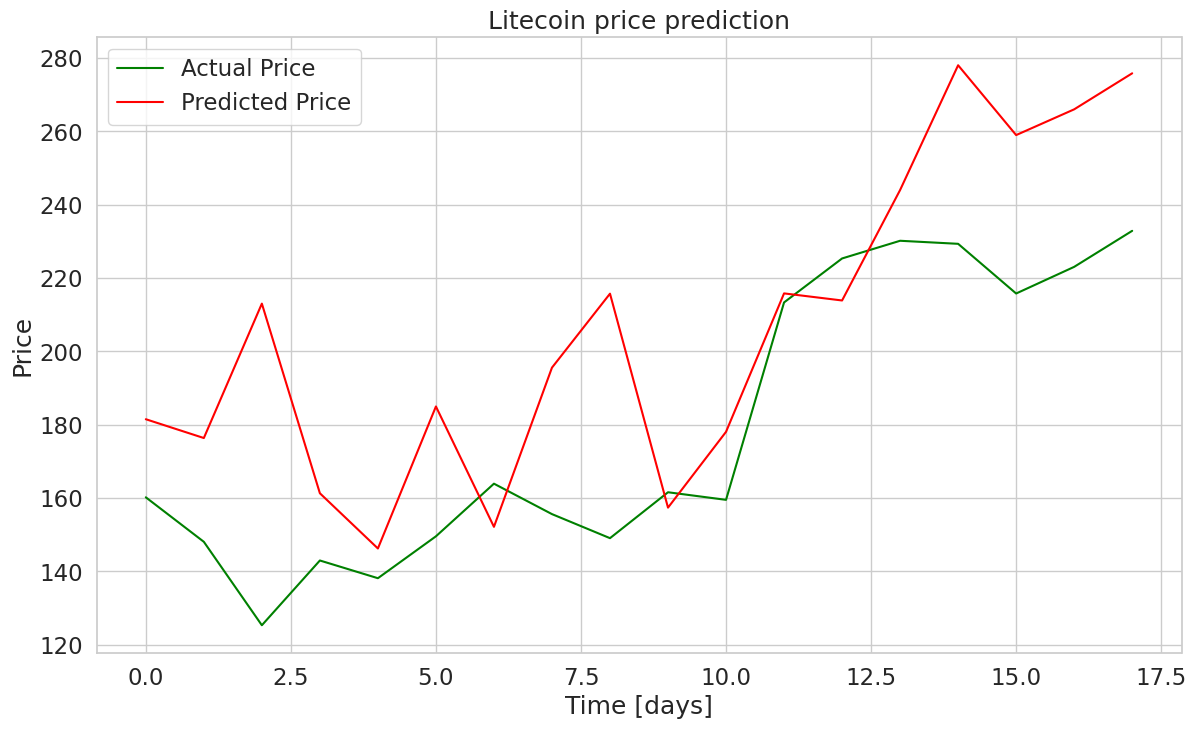

In [119]:
y_hat = tcn_model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Litecoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [120]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Make predictions on test data
y_pred = tcn_model.predict(X_test)
# Assuming `y_test_scaled` are the scaled actual values and `y_pred_scaled` are the scaled predictions
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calculate the mean squared error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE: ", rmse)

RMSE:  37.5733514140491


# **Ensembling**

We are ensembling BiLSTM and GRU neural networks to enhance predictive performance by averaging their predictions. This experiment aims to leverage the strengths of both models and potentially achieve better results compared to using a single model.

In [121]:
import numpy as np
from keras.models import load_model

gru_model.save("gru_model2.h5")
model.save("bilstm_model.h5")

# Assuming your models are saved as "bilstm_model.h5" and "gru_model.h5"
bilstm_model = load_model("/content/bilstm_model.h5")
gru_model = load_model("/content/gru_model2.h5")

# Make predictions using both models
bilstm_predictions = bilstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

# Combine predictions (e.g., averaging)
ensemble_predictions = (bilstm_predictions + gru_predictions) / 2

y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
ensemble_predictions_inverse = scaler.inverse_transform(ensemble_predictions.reshape(-1, 1))

# Calculate performance metric (e.g., RMSE)
rmse = np.sqrt(np.mean((y_test_inverse - ensemble_predictions_inverse)**2))
print("Ensemble RMSE:", rmse)

Ensemble RMSE: 25.37348204885295


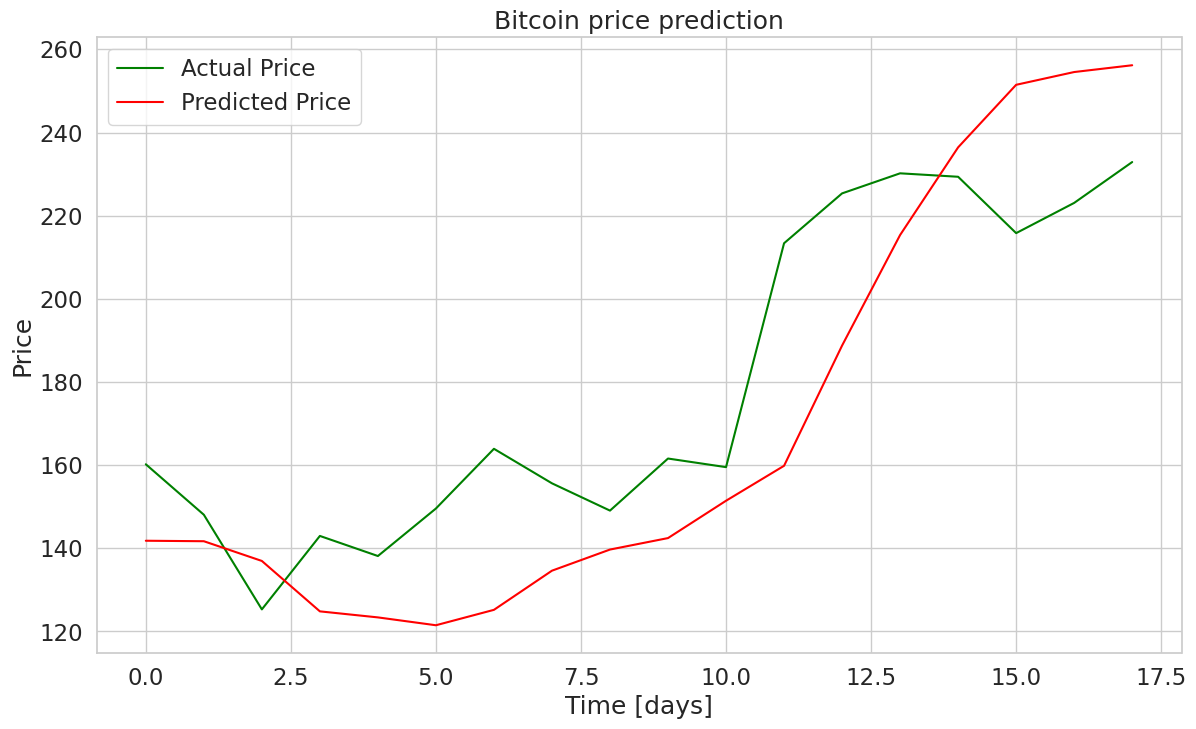

In [122]:
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(ensemble_predictions_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

## **5. Results**

# Results for Long-Term Call - Approach 1(EXTENSION)

**This is a result comparison of Approach 1, which is specifically designed for gaining insights about long-term calls where the daily_average_after_month serves as the outcome variable. In detail significace of each method is mentioned above in the notebook before each approach's implementation.**

In [123]:
model_performance_eth = {
    'Baseline': {'RMSE': 185.49},
    'Random Forest Regressor': {'RMSE': 64.06},
    'Gradient Boosting Regressor': {'RMSE': 59.30},
    'ExtraTrees Regressor': {'RMSE': 44.44},
    'Bayesian Ridge': {'RMSE': 178.86},
    'Elastic Net CV': {'RMSE': 177.32},
}

model_performance_ltc = {
    'Baseline': {'RMSE': 58.41},
    'Random Forest Regressor': {'RMSE': 20.28},
    'Gradient Boosting Regressor': {'RMSE': 20.33},
    'ExtraTrees Regressor': {'RMSE': 16.97},
    'Bayesian Ridge': {'RMSE': 57.36},
    'Elastic Net CV': {'RMSE': 58.87},
}

model_performance_btc = {
    'Baseline': {'RMSE': 2789.37},
    'Random Forest Regressor': {'RMSE': 640.04},
    'Gradient Boosting Regressor': {'RMSE': 581.34},
    'ExtraTrees Regressor': {'RMSE': 597.69},
    'Bayesian Ridge': {'RMSE': 2751.72},
    'Elastic Net CV': {'RMSE': 3030.54},
}



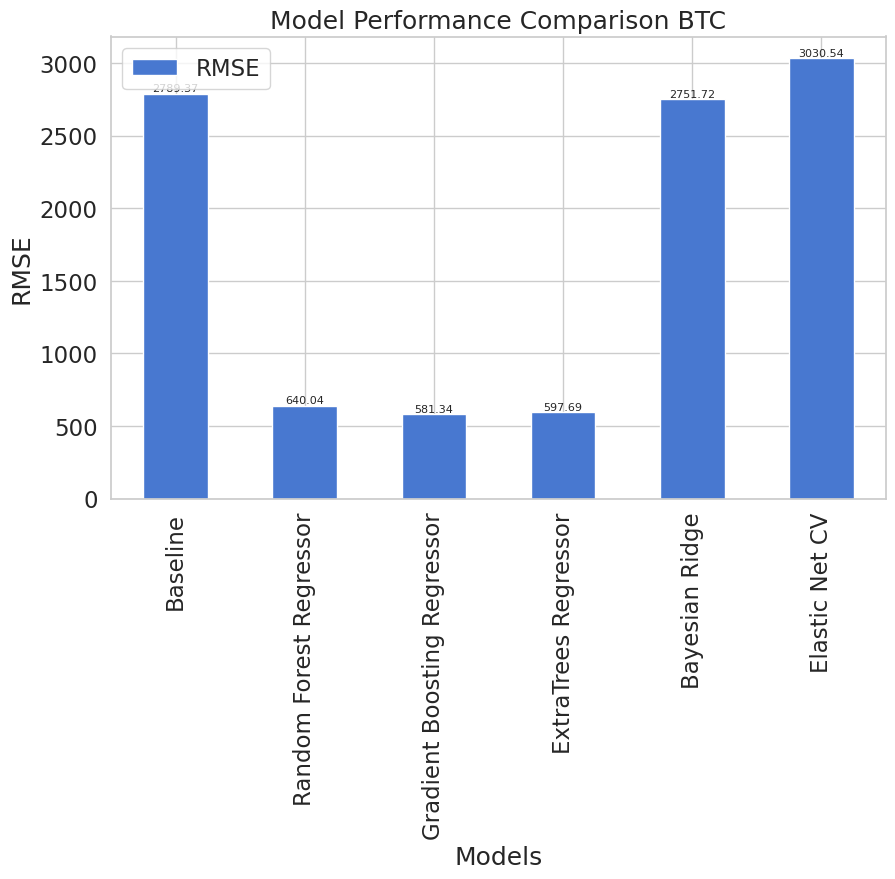

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

performance_df = pd.DataFrame(model_performance_btc).T

ax = performance_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison BTC')
plt.xticks(rotation=90)

# Loop through the bar containers and add the text above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)

plt.show()


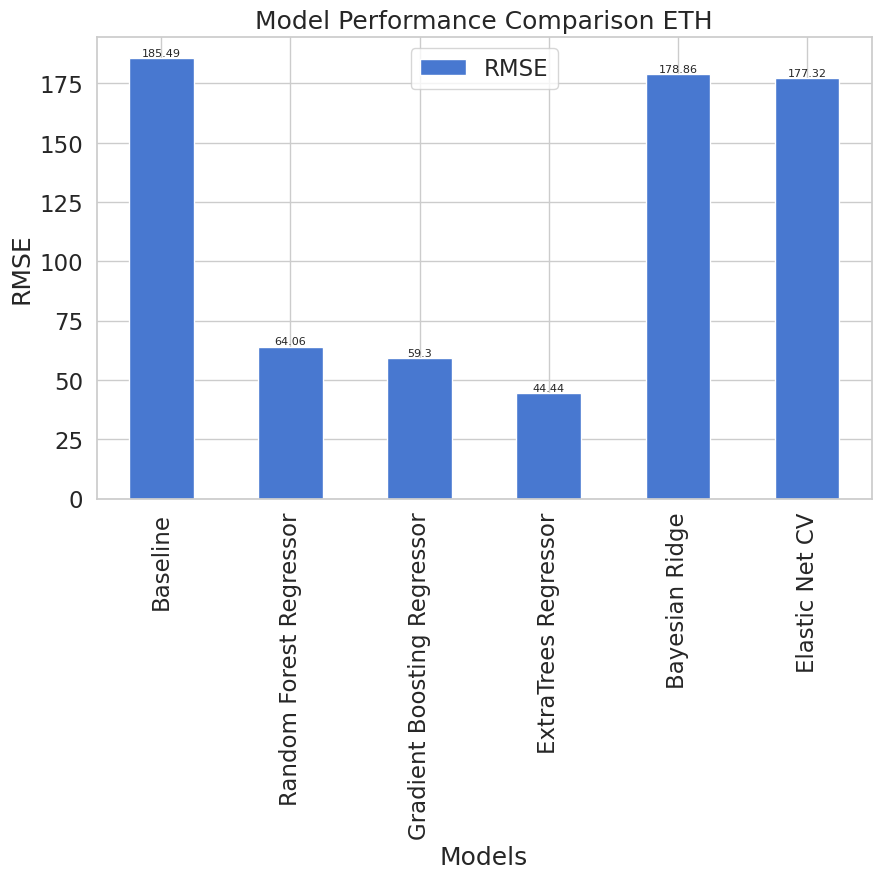

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

performance_df = pd.DataFrame(model_performance_eth).T

ax = performance_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison ETH')
plt.xticks(rotation=90)

# Loop through the bar containers and add the text above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)

plt.show()


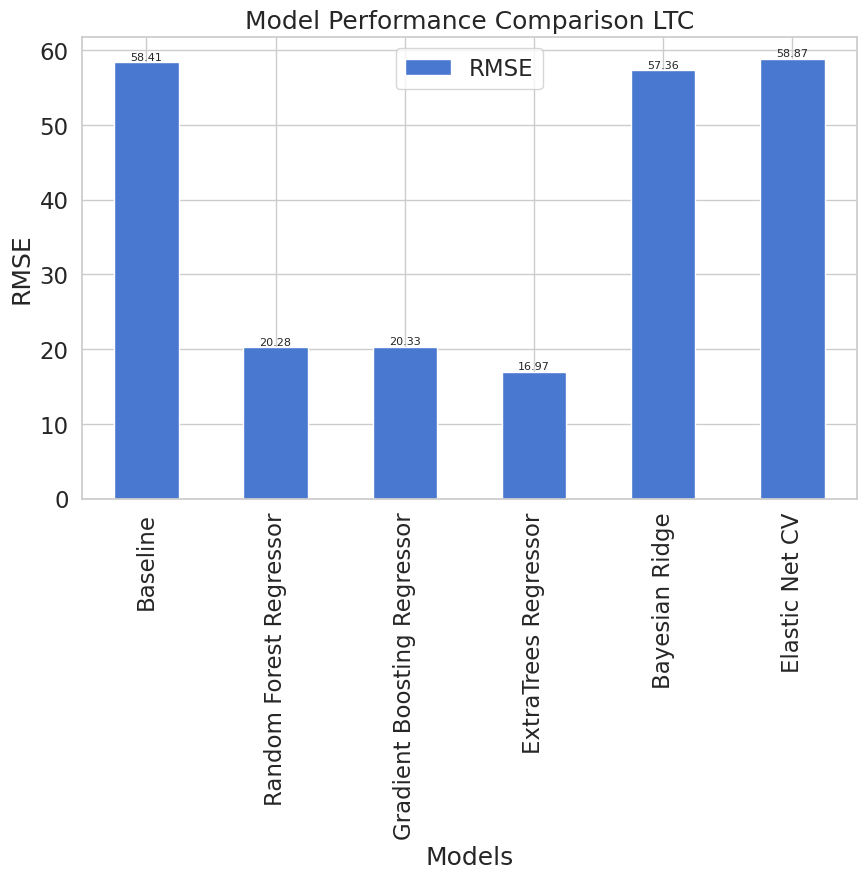

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

performance_df = pd.DataFrame(model_performance_ltc).T

ax = performance_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison LTC')
plt.xticks(rotation=90)

# Loop through the bar containers and add the text above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)

plt.show()


# Results for Short-Term Call (Approach 2)

**This is a result comparison of Approach 2, which is specifically designed for gaining insights about short-term calls where the close price serves as the outcome variable.**

In [127]:
model_performance_eth = {
    'Baseline': {'RMSE': 133.53},
    'Random Forest Regressor': {'RMSE': 25.04},
    'Gradient Boosting Regressor': {'RMSE': 16.75},
    'ExtraTrees Regressor': {'RMSE': 22.94},
    'Elastic Net CV': {'RMSE': 39.55},
    'BI-LST': {'RMSE':33.67},
    'TCN': {'RMSE':31.78},
    'GRU': {'RMSE':20.66},
    'Ensemble Model': {'RMSE':23.64},
}

model_performance_ltc = {
    'Baseline': {'RMSE': 42.04},
    'Random Forest Regressor': {'RMSE': 9.93},
    'Gradient Boosting Regressor': {'RMSE': 7.90},
    'ExtraTrees Regressor': {'RMSE': 8.80},
    'Elastic Net CV': {'RMSE': 18.35},
    'BI-LST': {'RMSE':24.70},
     'TCN': {'RMSE':22.87},
    'GRU': {'RMSE':10.64},
    'Ensemble Model': {'RMSE':14.64},
    
}

model_performance_btc = {
    'Baseline': {'RMSE': 3659.37},
    'Random Forest Regressor': {'RMSE': 424.04},
    'Gradient Boosting Regressor': {'RMSE': 320.34},
    'ExtraTrees Regressor': {'RMSE': 382.69},
    'Elastic Net CV': {'RMSE': 747.54},
    'BI-LST': {'RMSE':2233.34},
     'TCN': {'RMSE':2056.11},
    'GRU': {'RMSE':406.035},
    'Ensemble Model': {'RMSE':1023.64},
}



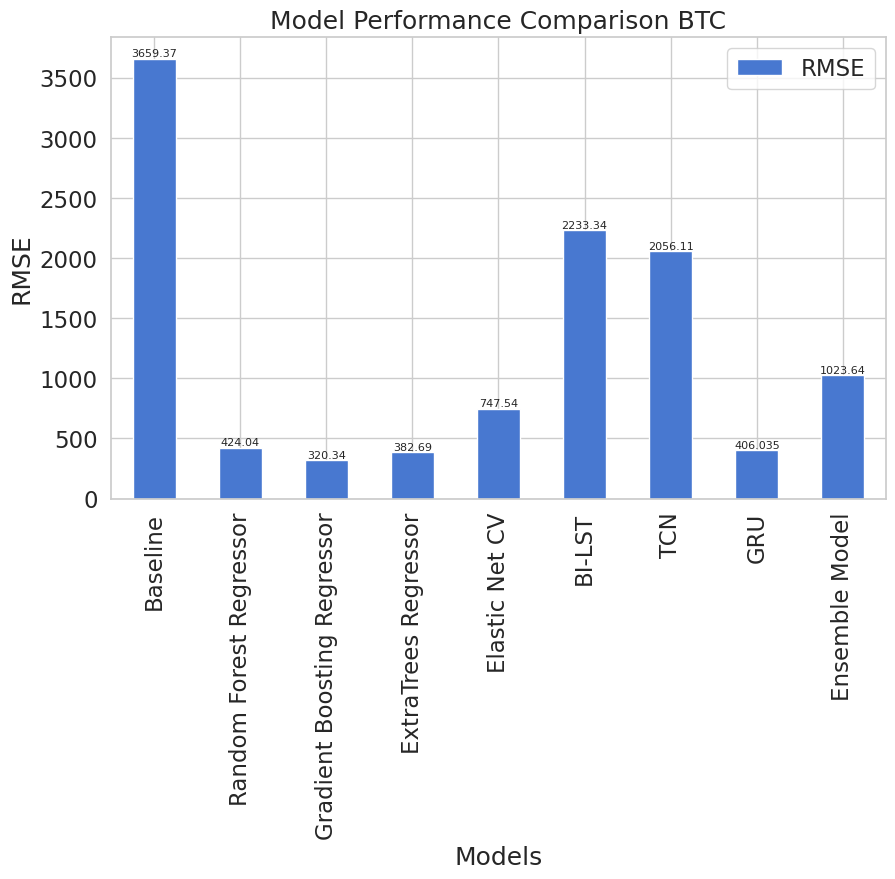

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

performance_df = pd.DataFrame(model_performance_btc).T

ax = performance_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison BTC')
plt.xticks(rotation=90)

# Loop through the bar containers and add the text above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)

plt.show()


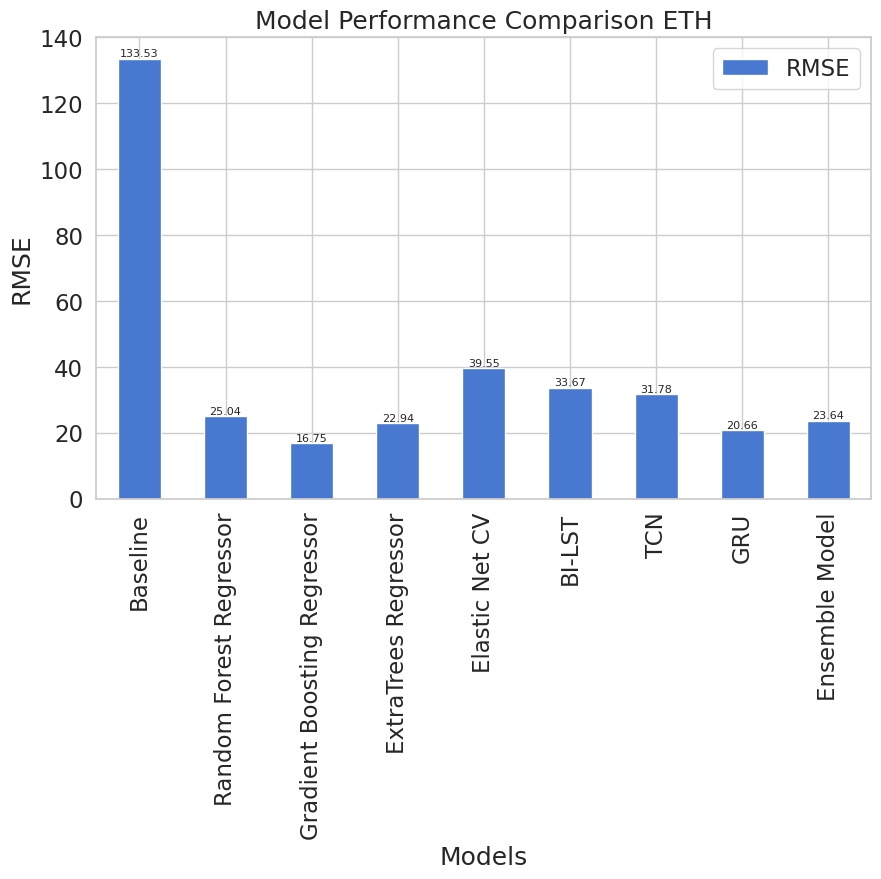

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

performance_df = pd.DataFrame(model_performance_eth).T

ax = performance_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison ETH')
plt.xticks(rotation=90)

# Loop through the bar containers and add the text above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)

plt.show()


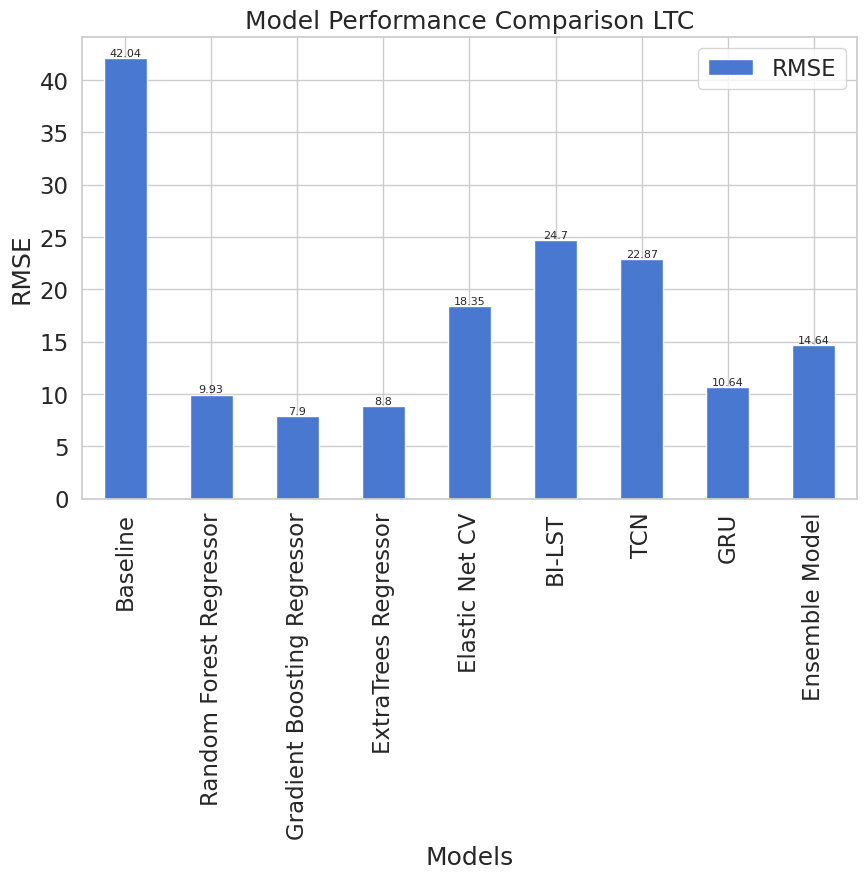

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

performance_df = pd.DataFrame(model_performance_ltc).T

ax = performance_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison LTC')
plt.xticks(rotation=90)

# Loop through the bar containers and add the text above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)

plt.show()


## **6. Conclusion**

In conclusion, based on the performance of the models, it is evident that the ExtraTrees Regressor has outperformed other traditional machine learning models for all three cryptocurrencies: Ethereum (ETH), Litecoin (LTC), and Bitcoin (BTC). The Random Forest Regressor and Gradient Boosting Regressor also showed reasonably good performance compared to the baseline linear regression model.

It is **important** to note that deep learning models such as **GRU, BiLSTM, and TCN** did not perform as well as some of the decision tree-based models in our current experiments. However, these deep learning models showed promising results in the plots and have the potential to improve their performance with fine-tuning. Due to time constraints, we were unable to perform an extensive hyperparameter search and model optimization for these deep learning models, but they have the potential to excel in time series prediction tasks, given their ability to capture long-term dependencies and temporal patterns in the data.

In summary, while decision tree-based models, such as the ExtraTrees Regressor, demonstrated the best performance in our experiments, deep learning models like GRU, BiLSTM, and TCN still hold promise for time series cryptocurrency prediction tasks. With further fine-tuning and optimization, these models may yield even better results, making them a valuable area for future exploration and experimentation.

## **7. Business Insights.**

The cryptocurrency market, characterized by its volatility, has garnered immense interest from investors, traders, and businesses alike. Our project aims to provide valuable insights into the behavior of cryptocurrencies such as **Bitcoin, Ethereum, and Litecoin** by leveraging advanced machine learning techniques to analyze their short-term and long-term trends. This comprehensive analysis not only serves as a guide for strategic investment choices but also sheds light on the business side of the cryptocurrency market.

In our project, we conducted two separate experiments to gain insights into the **short-term and long-term behavior** of these cryptocurrencies. For the short-term analysis, we used the daily closing prices as the outcome variable, while for the long-term analysis, we employed the daily average price after a month as the outcome variable. These experiments allowed us to explore different time horizons and extract valuable information on potential investment strategies.

Our **short-term predictions** for Bitcoin, Ethereum, and Litecoin indicate a continued volatile price trajectory, with downward trends often following upward trends. This fluctuation can be attributed to various factors, including market sentiment, regulatory developments, and technological advancements. Given the observed short-term price fluctuations, traders are advised to consider short-term put options to potentially profit from downward trends. By taking a bearish position in the short term, traders can mitigate their risk exposure to the inherent volatility of the cryptocurrency market.

However, it is crucial to consider the long-term potential of these digital assets as well. Our **long-term analysis**, based on the daily average price after a month, suggests that despite short-term volatility, cryptocurrencies like Bitcoin, Ethereum, and Litecoin have the potential to appreciate in value over the long run. This long-term perspective aligns with the growing adoption of blockchain technology and the increasing recognition of cryptocurrencies as a viable asset class. Investors seeking long-term growth may benefit from a long-term call option strategy, capitalizing on the potential appreciation of these digital assets while mitigating the risk associated with short-term price fluctuations.

**From a business perspective**, accurate cryptocurrency predictions can offer several benefits. First, businesses can leverage these insights to develop innovative financial products and services, such as cryptocurrency-based investment funds, derivatives, and trading platforms. By catering to the growing demand for cryptocurrency-related offerings, businesses can tap into new revenue streams and expand their market share.

Second, businesses involved in blockchain technology and cryptocurrency mining can use these predictions to make strategic decisions about their operations. For instance, they can optimize their mining activities based on anticipated price movements or allocate resources more effectively.

Finally, accurate predictions can also benefit businesses that accept cryptocurrencies as a mode of payment. By forecasting short-term price fluctuations, these businesses can hedge against the inherent volatility of cryptocurrencies and better manage their cash flow and financial risk.

**In conclusion**, our comprehensive analysis of Bitcoin, Ethereum, and Litecoin has provided valuable insights into the short-term and long-term trends of these cryptocurrencies. By utilizing advanced machine learning techniques, we have identified potential investment strategies that cater to both short-term traders and long-term investors. As the cryptocurrency market continues to evolve and mature, accurate predictions will become increasingly crucial for driving strategic decision-making and unlocking new opportunities in this dynamic landscape.

# **Bitcoin**
Looking at the short-term forcasted trend in next month, the predicted price of Bitcoin is still volatile. Downward trending follows right after an increasing price trend, mainly because of the lacking of momentum. Investors need to be cautious with the drastic price flunctuation. Traders are advised to buy a **short-term put option** and **long-term call option**.

# **Ethereum**
Similar to Bitcoin, the predicted price of Ethereum is volitle. Downward trending follows right after an increasing price trend, mainly because of the lacking of momentum. 

Investors need to be cautious with the drastic price flunctuation as the price has been gone very high. Traders are advised to buy a **short-term put option** and **long-term call option**.

# **Litcoin**
The predicted price of Litcoin is still volatile. The lack in momentum is obvious in Litcoin's price. In the short term, Litcion holder is advertise to sell the coin in the near future, and traders are advised to buy a **short-term put option** and **long-term call option**.

# **8. Interactive Dashboard**

### **Here's a brief set of instructions for running the code for interactive dashboard:**
**Note:** *You can locate the app.py and the template file within project zip folder. To get started, simply run app.py and enjoy a seamless user experience with the beautifully designed application interface.*

1. Make sure you have Python 3.7 or later installed on your system. You can check your Python version by running python --version or python3 --version in the terminal.

2. Create a new directory for your project and navigate to it in the terminal.

3. In the project directory, create a templates folder and place the 'crypto_tracker.html' template file inside it.

4. Place the 'app.py' file and the crypto-markets copy.csv dataset file in the project directory, alongside the templates folder.

5. Make sure you have the required libraries installed. If you haven't already, you can install them by running the following command in the terminal:
        **pip install flask pandas plotly sklearn**

6. If you face issues with Flask, watchdog, or Jinja2, you may need to uninstall and reinstall these libraries. To do so, run the following commands:

          **pip uninstall flask watchdog jinja2**
          **pip install flask watchdog jinja2**

7. Once all the required libraries are installed, run the Flask application by executing the following command in the terminal:

          **python app.py**

8. The application should start, and you'll see output indicating the server is running, such as:

    **Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)**

9. Open your web browser and navigate to the URL displayed in the terminal output (e.g., http://127.0.0.1:5000/). You should now see the Crypto Tracker application running in your browser.

10. Use the application to select a coin, investment date, investment amount, and target date, then click **"Apply"** to see the predicted value and potential profit or loss.




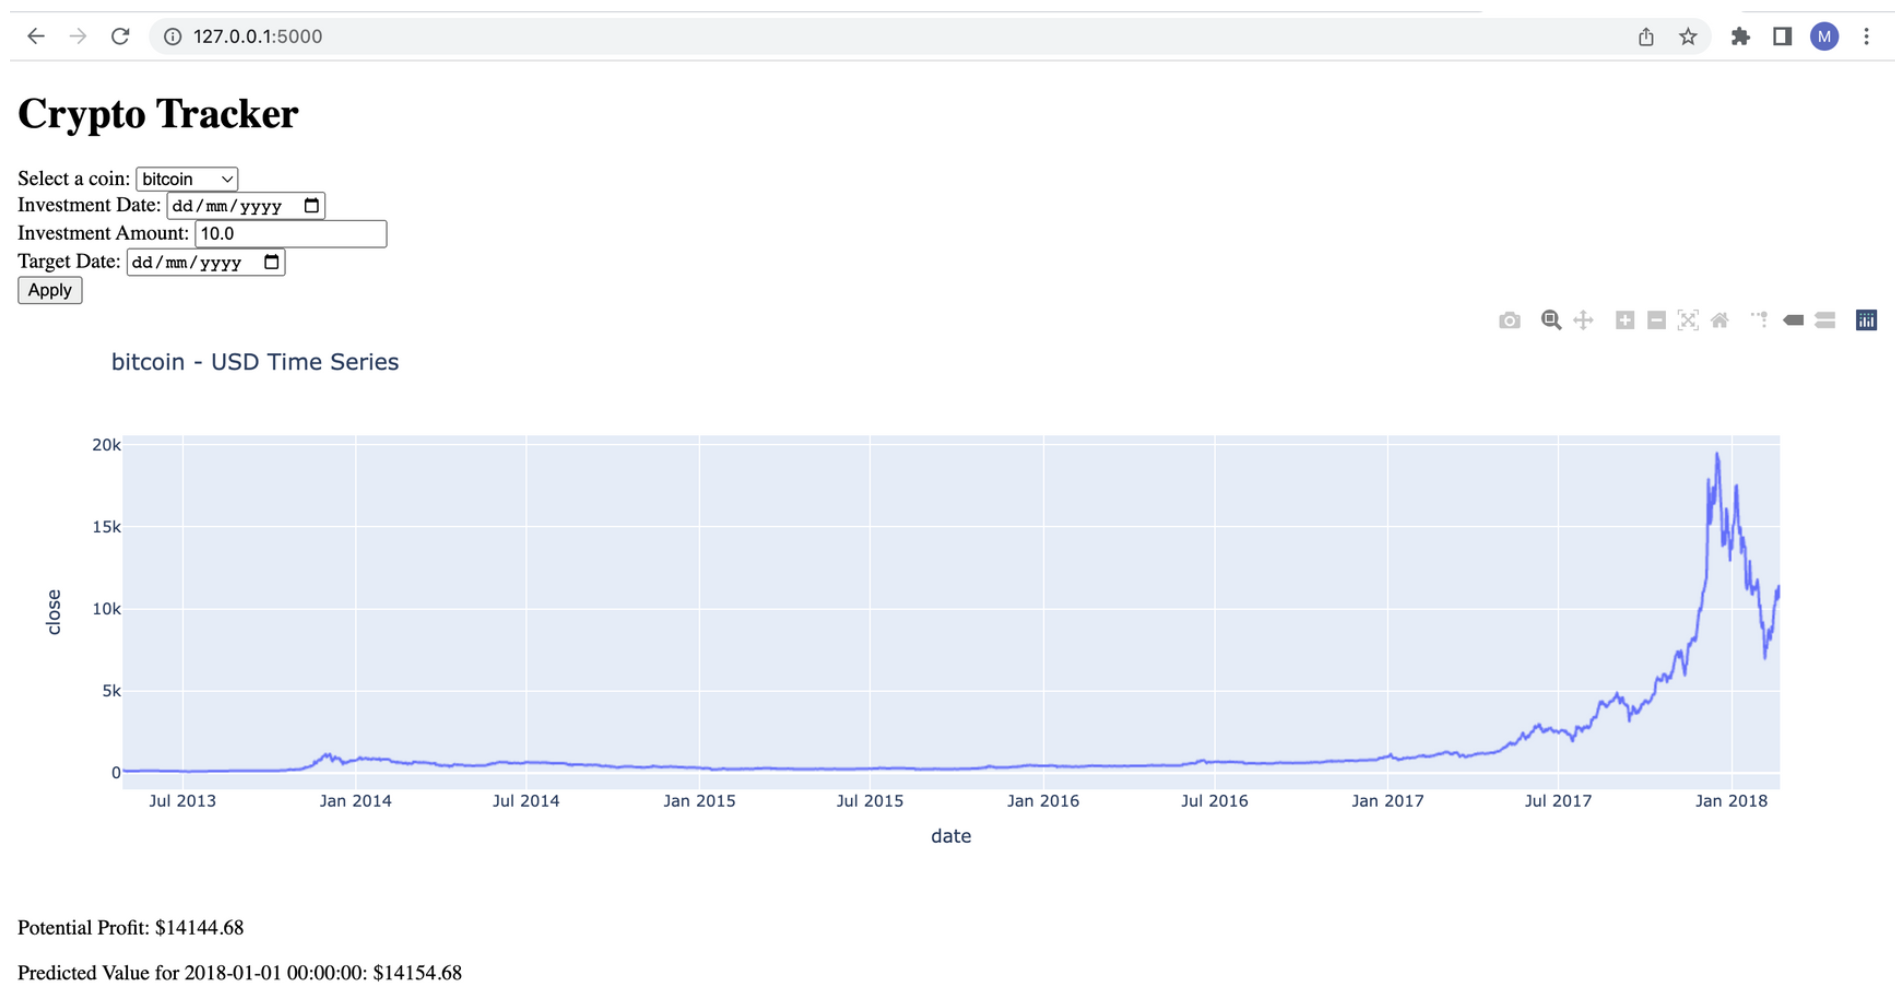